In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df_train = pd.read_csv("DisClass_Training.csv")
df_test = pd.read_csv("DisClass_Testing.csv")

In [3]:
df_train.dropna(axis=1, inplace=True)
df_train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
label_encoder = LabelEncoder()

df_train['prognosis_encoded'] = label_encoder.fit_transform(df_train['prognosis'])
df_test['prognosis_encoded'] = label_encoder.fit_transform(df_test['prognosis'])

In [5]:
print(f'Shape of training dataset is: {df_train.shape}')
print(f'Shape of testing dataset is: {df_test.shape}')

Shape of training dataset is: (4920, 134)
Shape of testing dataset is: (42, 134)


In [6]:
print(f'Missing values in training dataset is {df_train.isnull().sum().sum()}')
print(f'Missing values in testing dataset is {df_test.isnull().sum().sum()}')

Missing values in training dataset is 0
Missing values in testing dataset is 0


In [7]:
#Splitting dataset

X_train = df_train.drop(['prognosis','prognosis_encoded'], axis=1)
y_train = df_train.prognosis_encoded

X_test = df_test.drop(['prognosis','prognosis_encoded'], axis=1)
y_test = df_test.prognosis_encoded

y_true = df_test.prognosis_encoded

In [8]:
len(X_train)

4920

In [9]:
len(X_test)

42

**`Logistic Regression`**

In [10]:
model1 = LogisticRegression()

**`Decision Tree Classifier`**

In [11]:
model2 = tree.DecisionTreeClassifier(criterion='entropy')

**`SVC`**

In [12]:
model3 = SVC()

**`Naive Bayes`**

In [13]:
model4 = GaussianNB()
model5 = MultinomialNB()

**`Random Forest`**

In [14]:
model6 = RandomForestClassifier(n_estimators=200, criterion='entropy')

***

In [15]:
models = [model1, model2, model3, model4, model5, model6]

In [16]:
[model.fit(X_train, y_train) for model in models]

[LogisticRegression(),
 DecisionTreeClassifier(criterion='entropy'),
 SVC(),
 GaussianNB(),
 MultinomialNB(),
 RandomForestClassifier(criterion='entropy', n_estimators=200)]

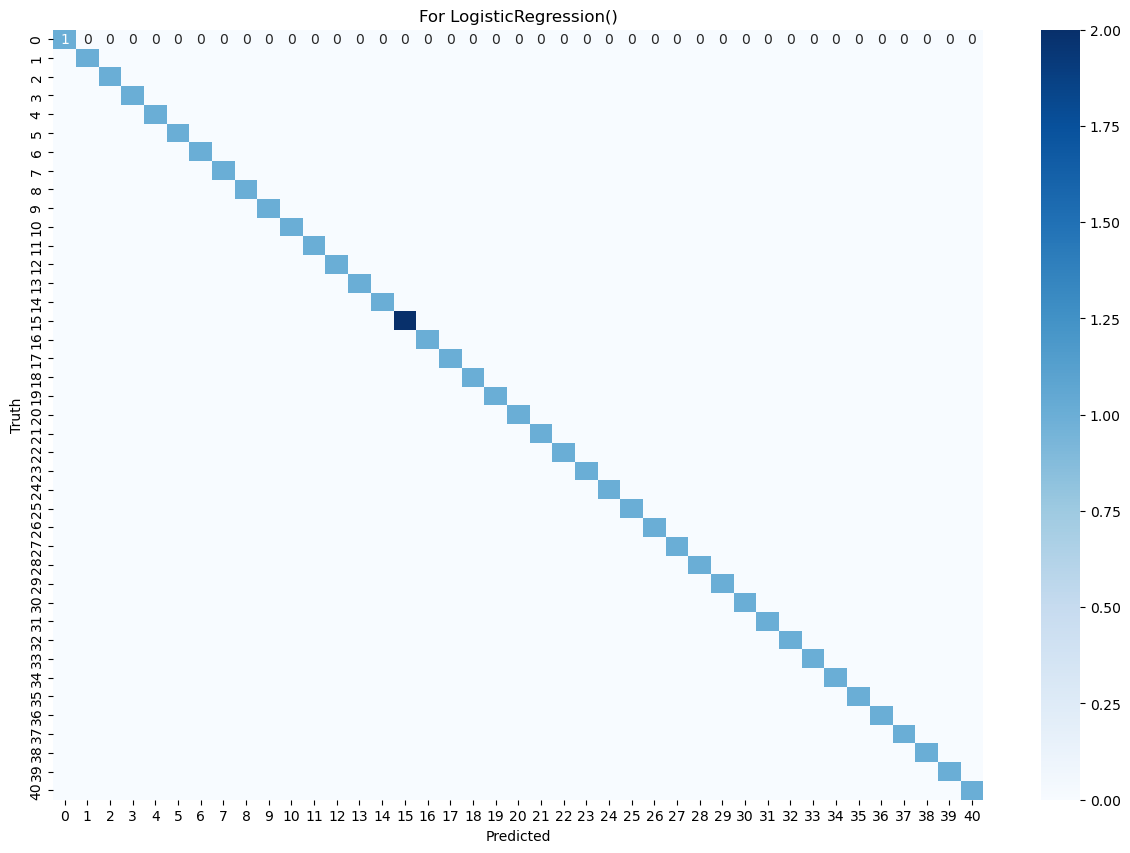

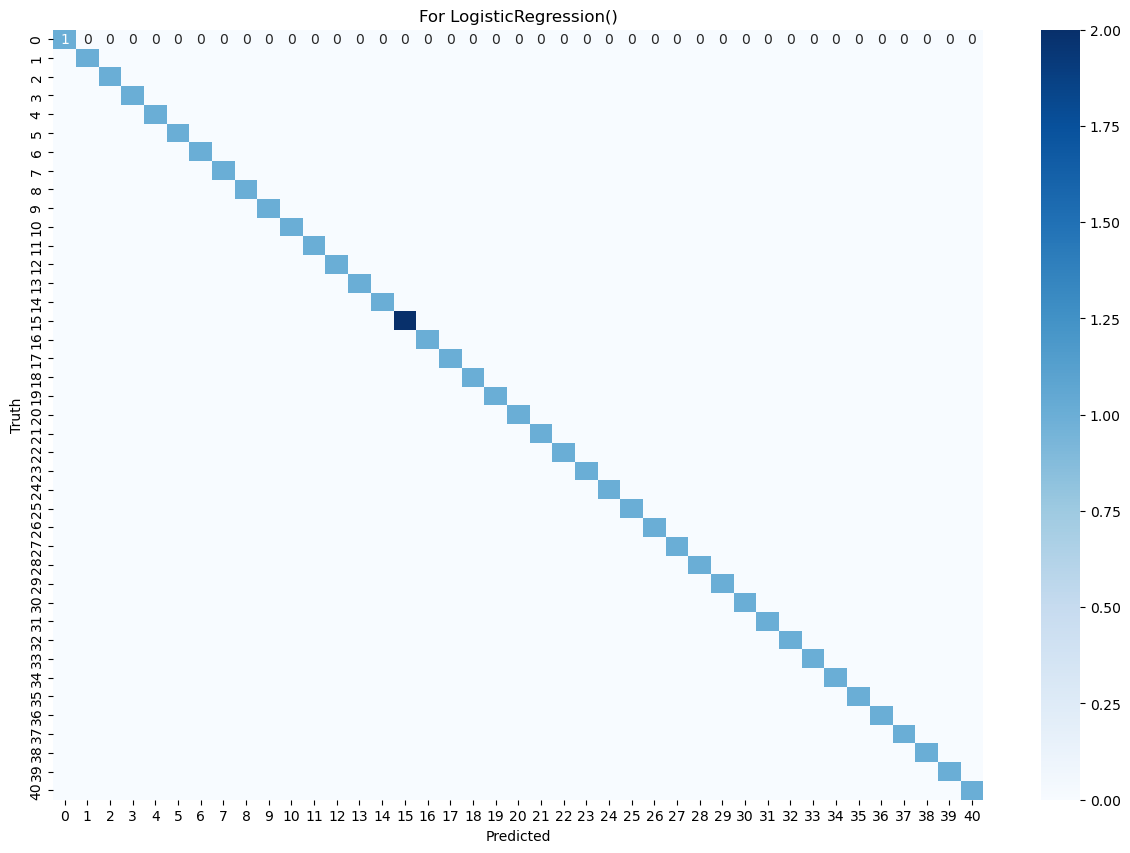

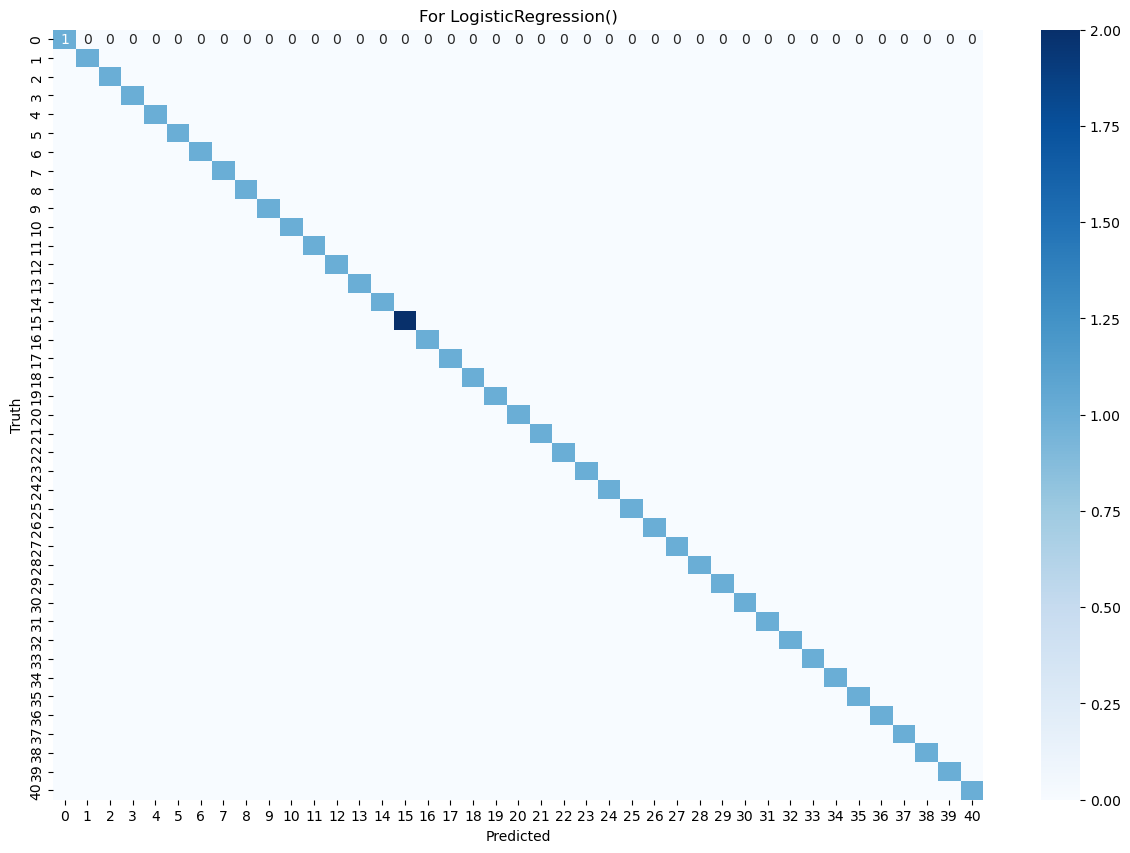

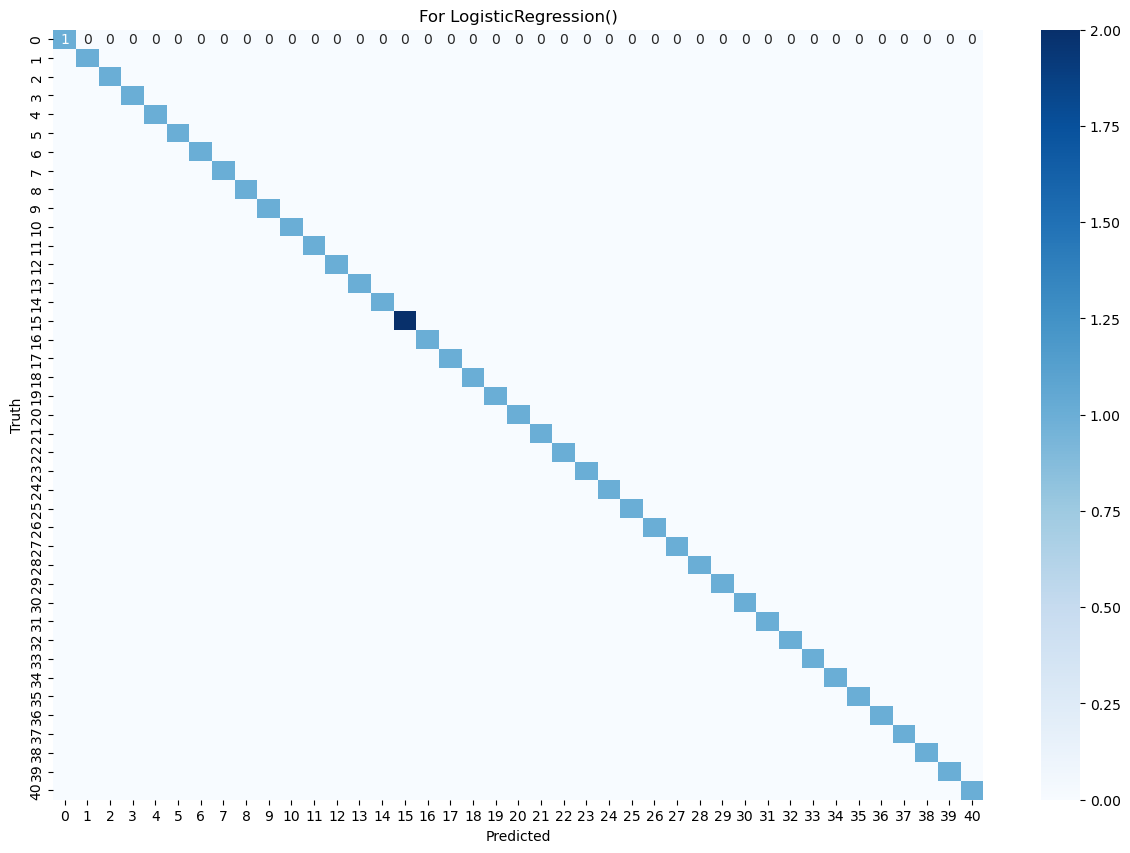

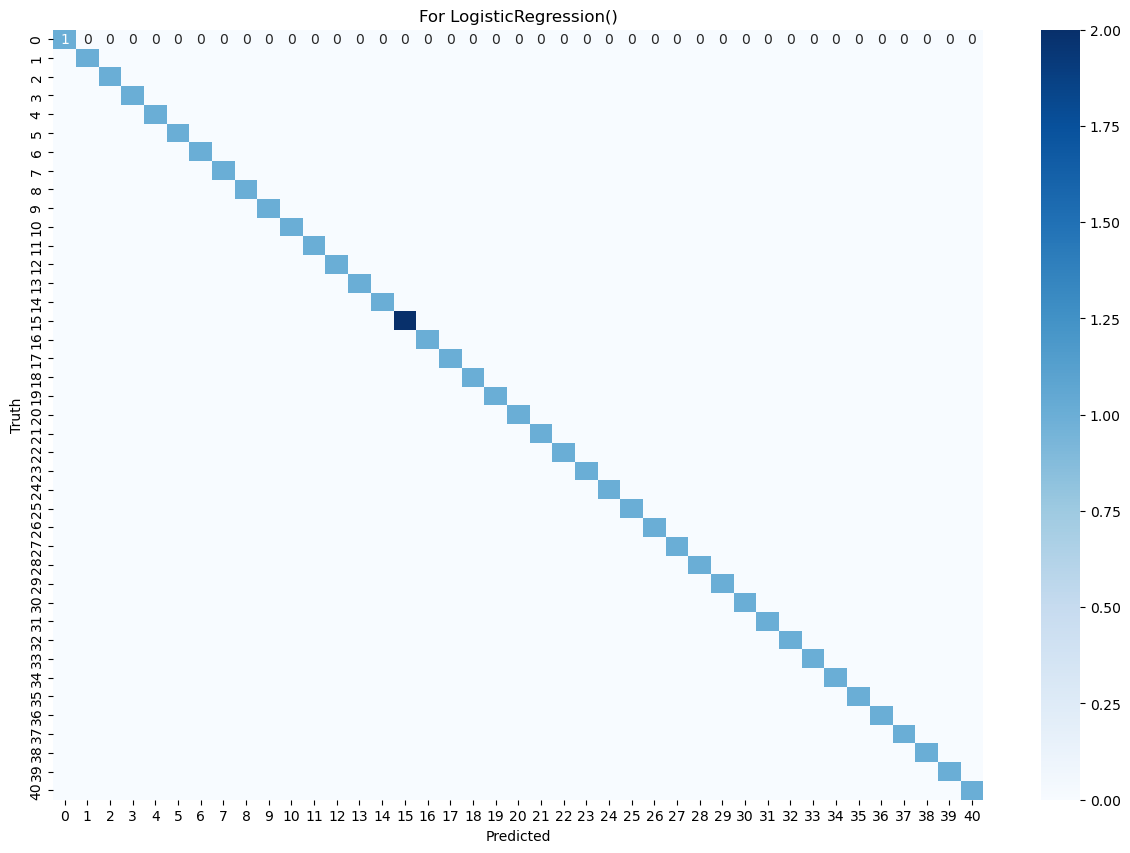

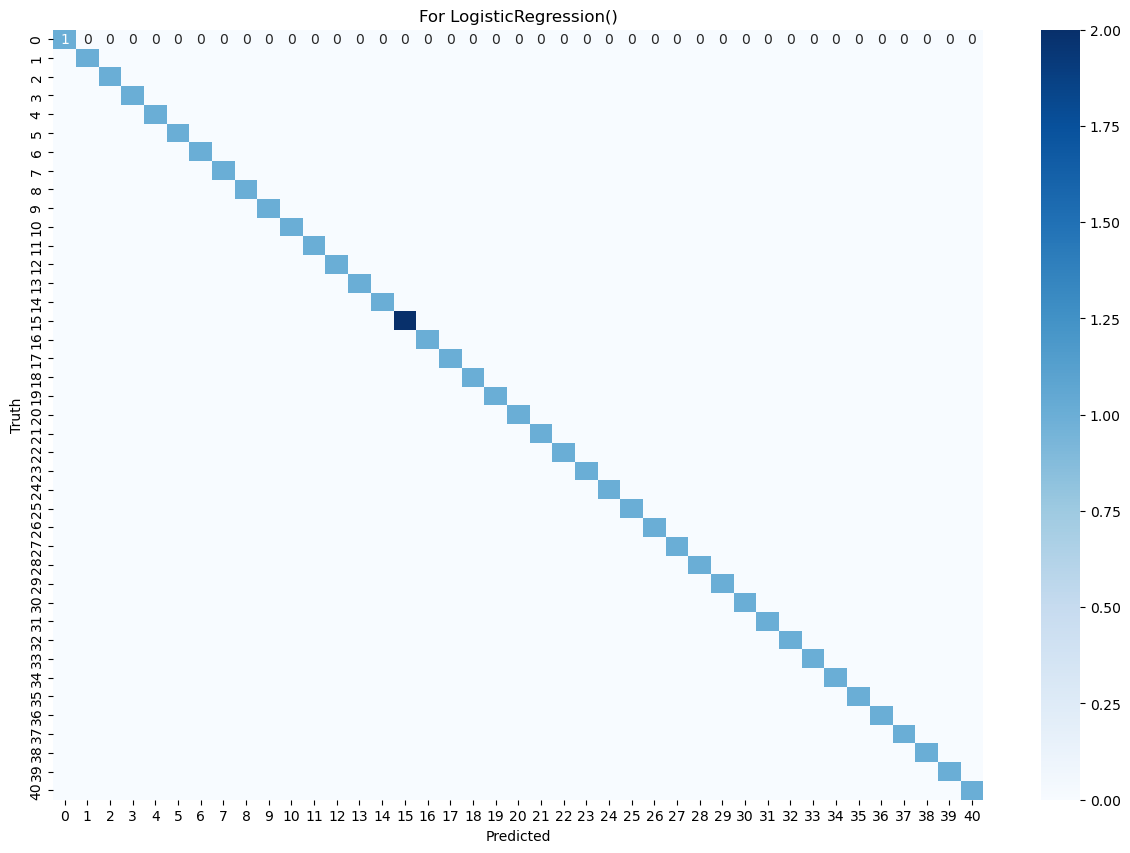

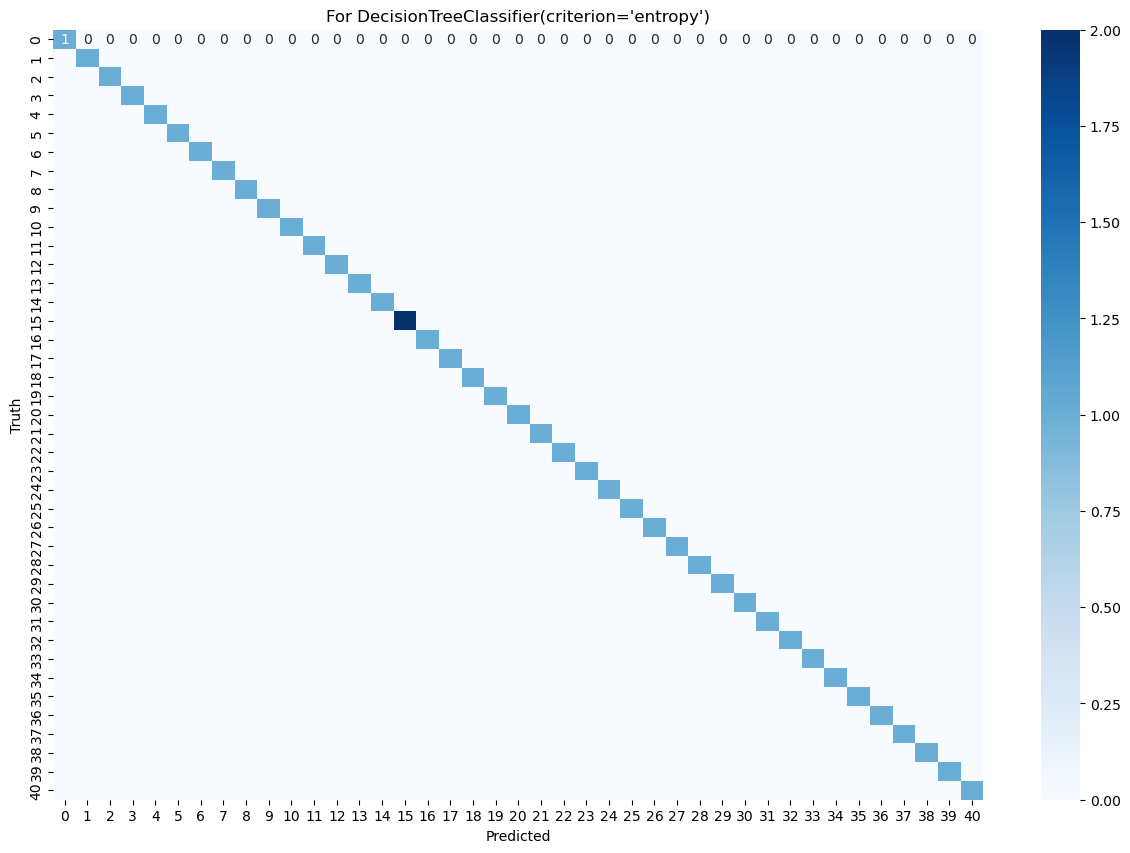

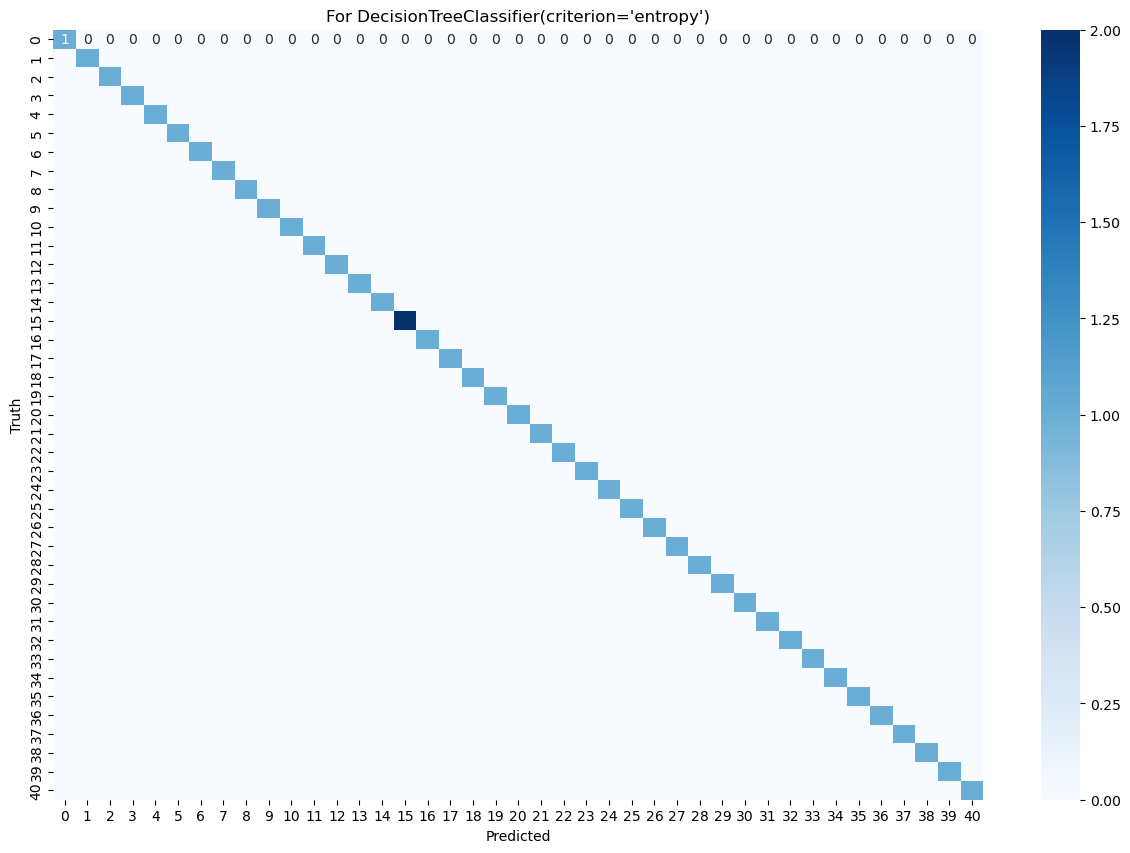

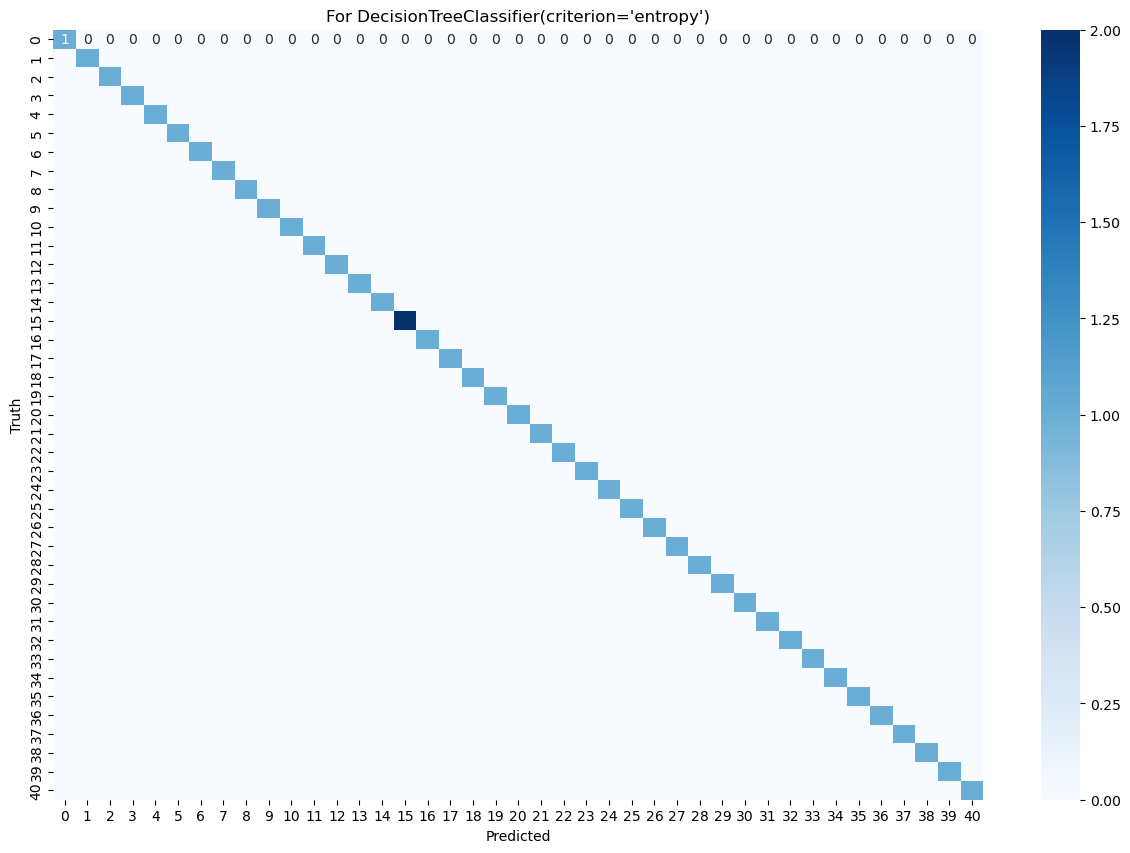

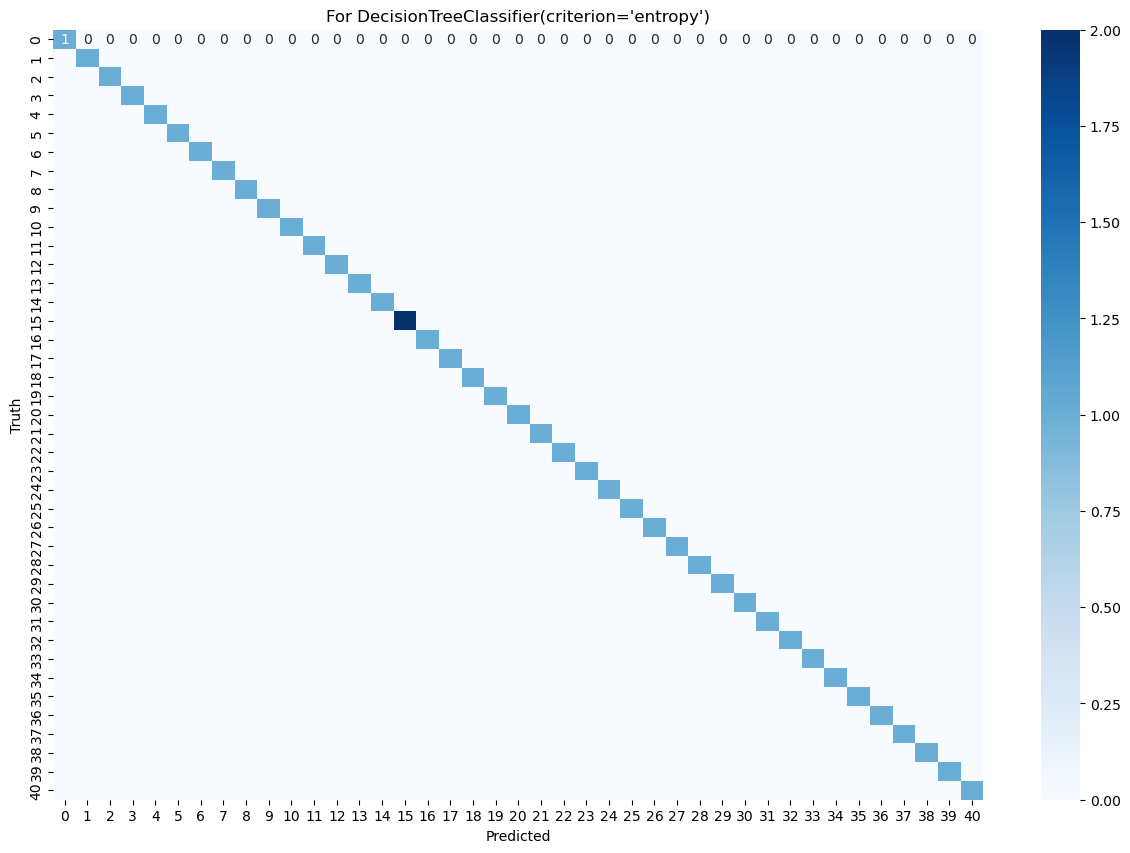

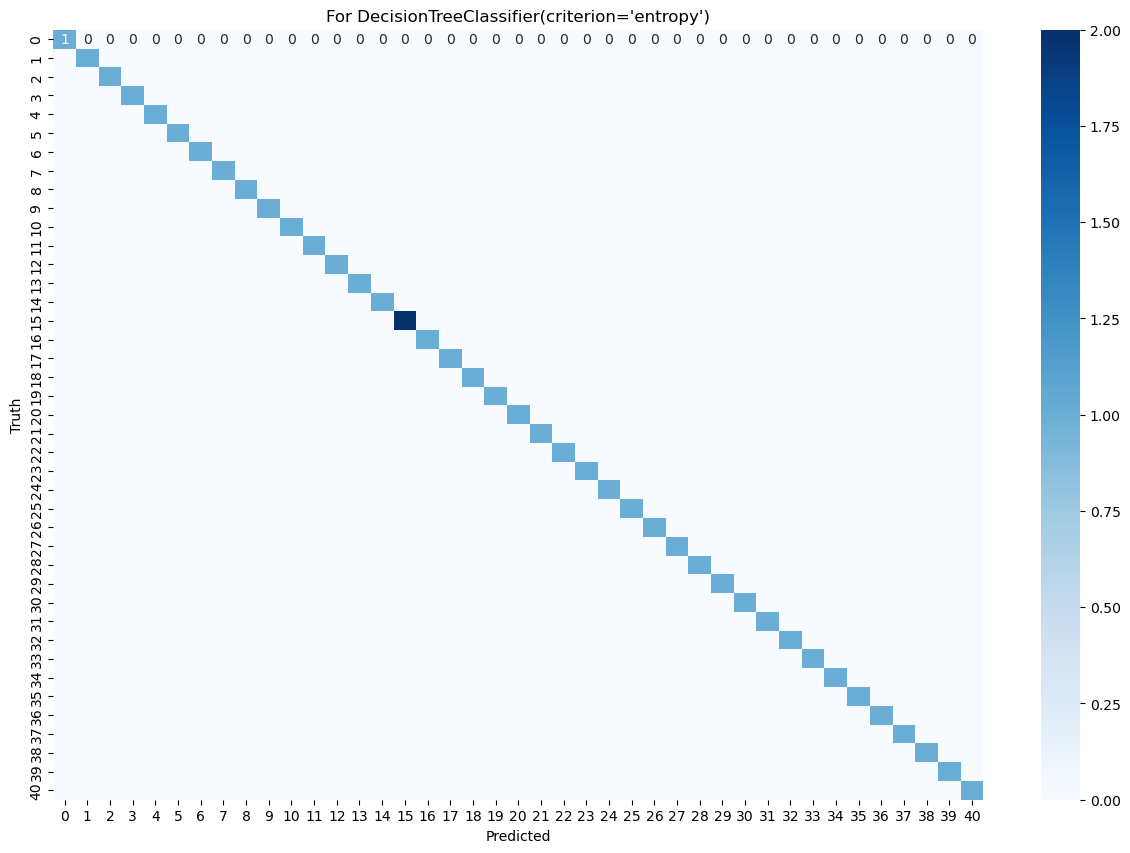

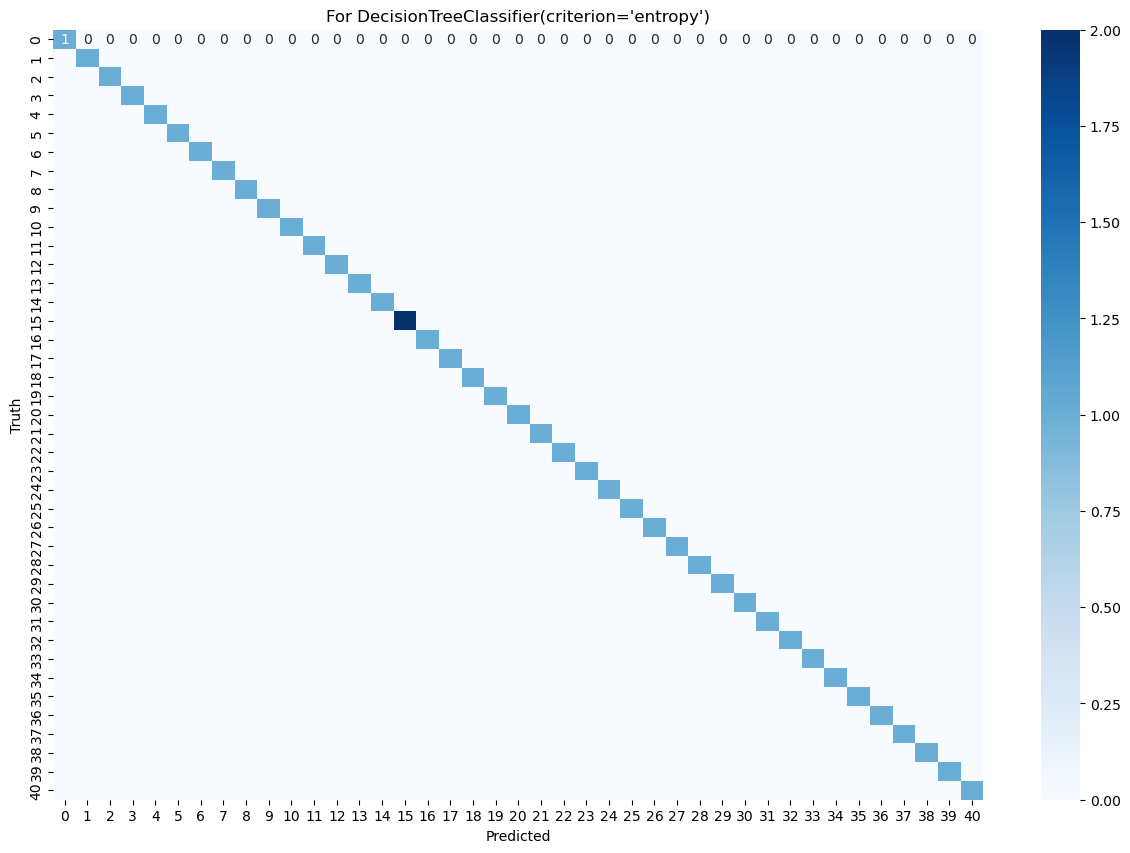

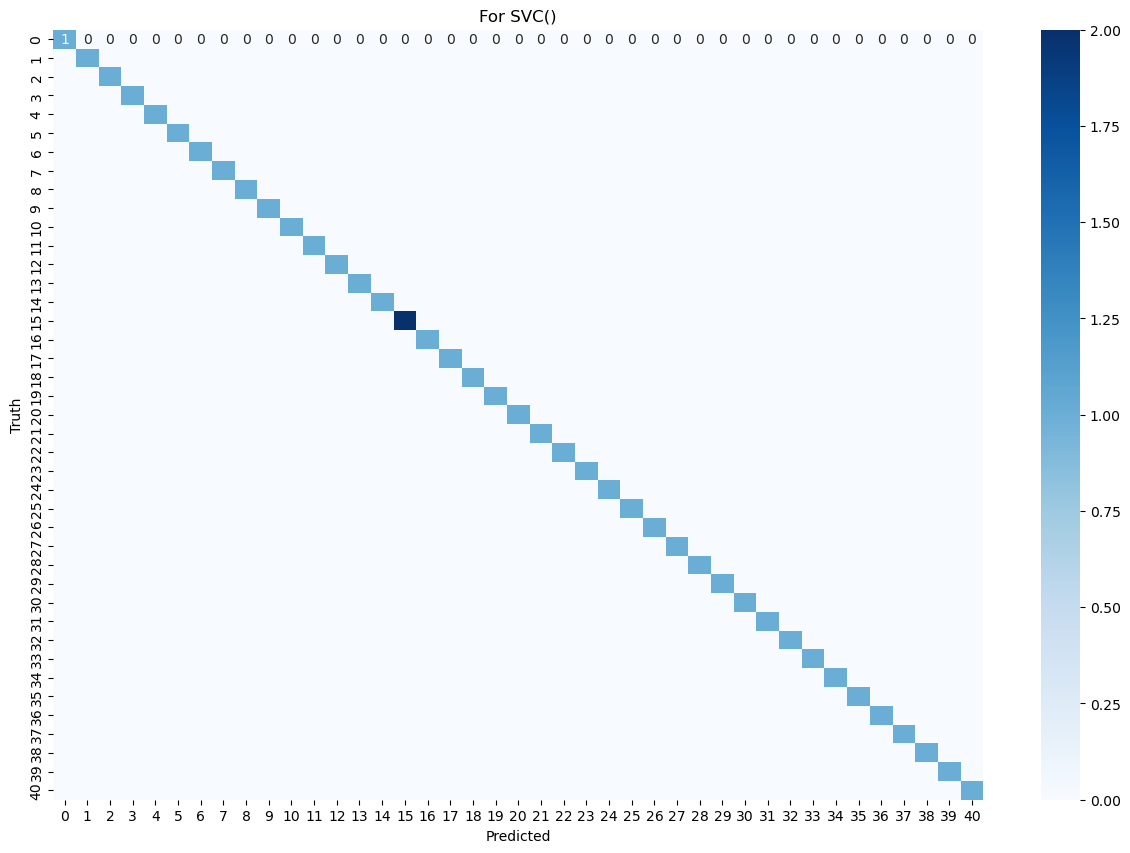

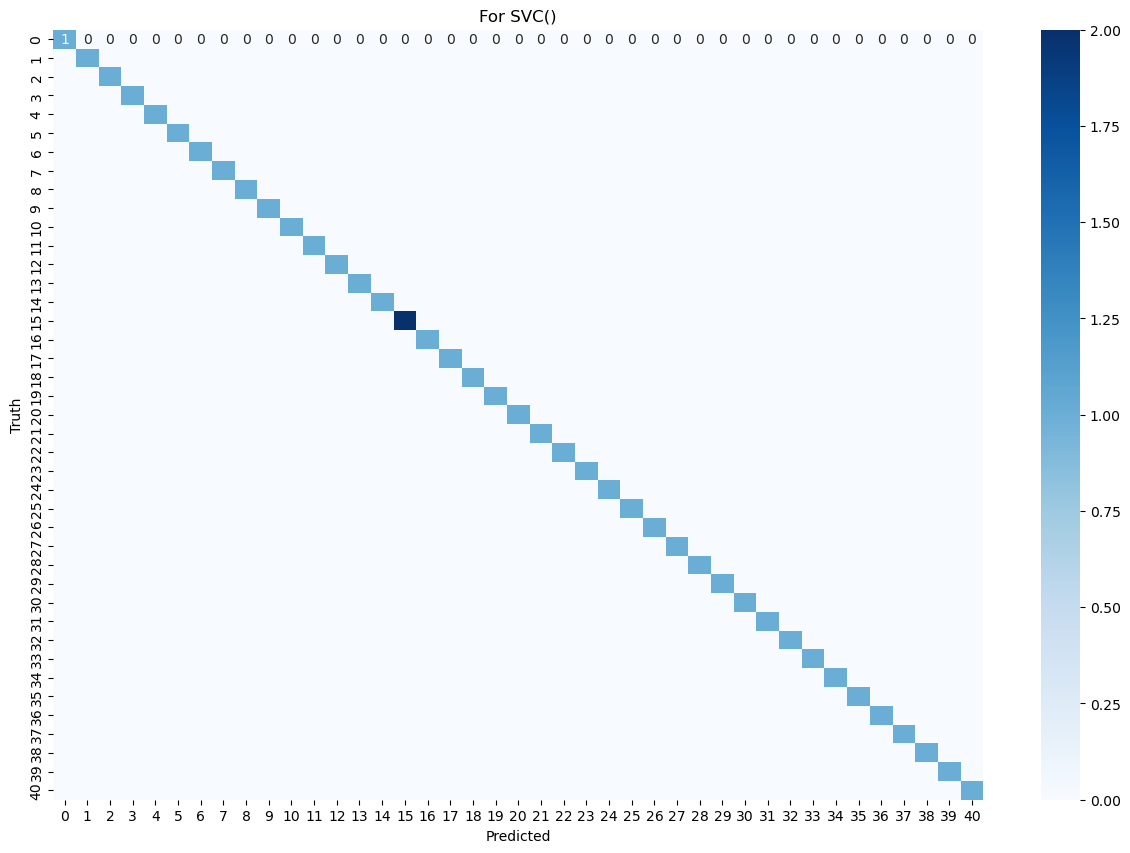

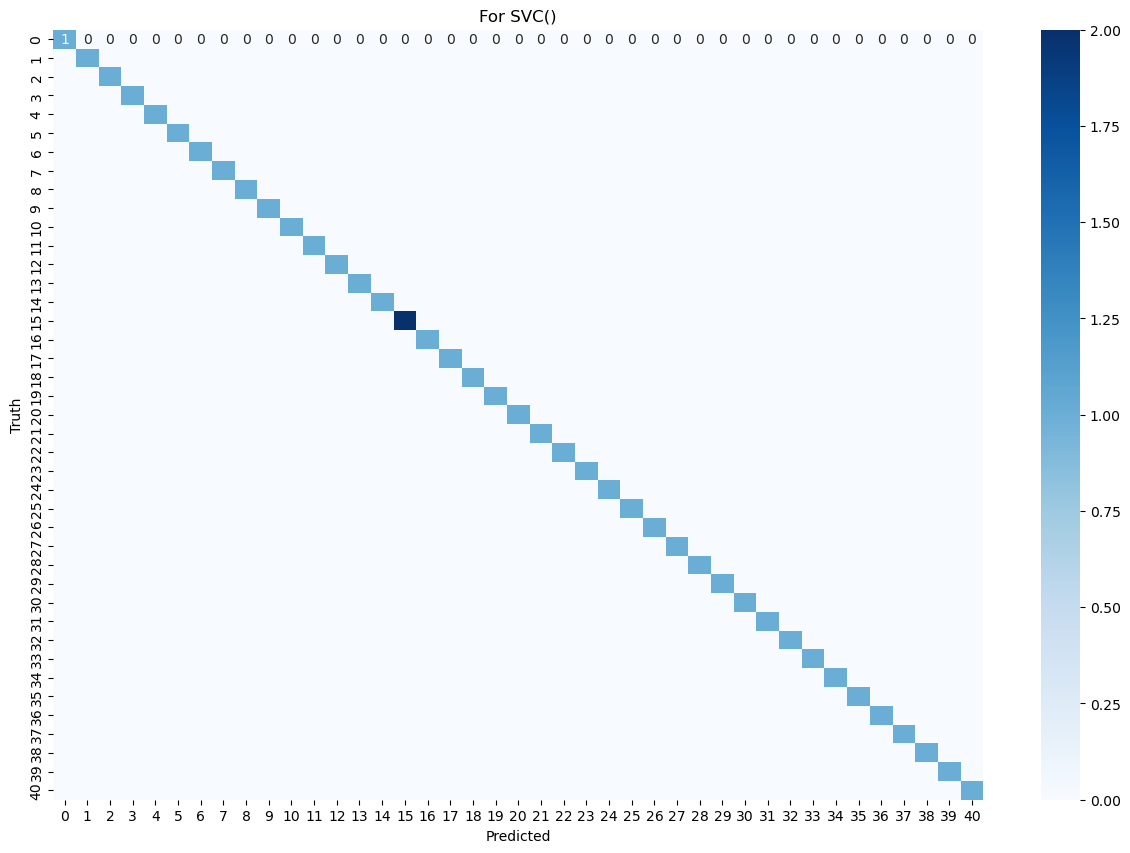

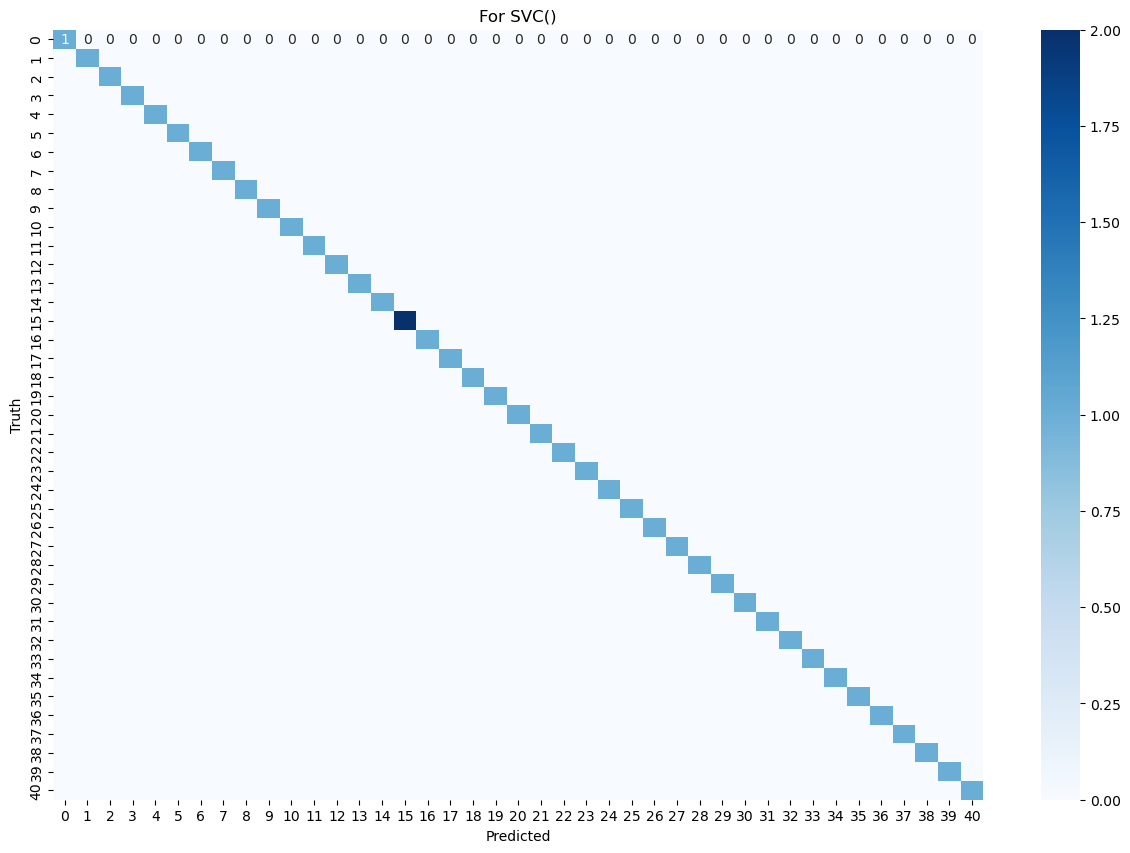

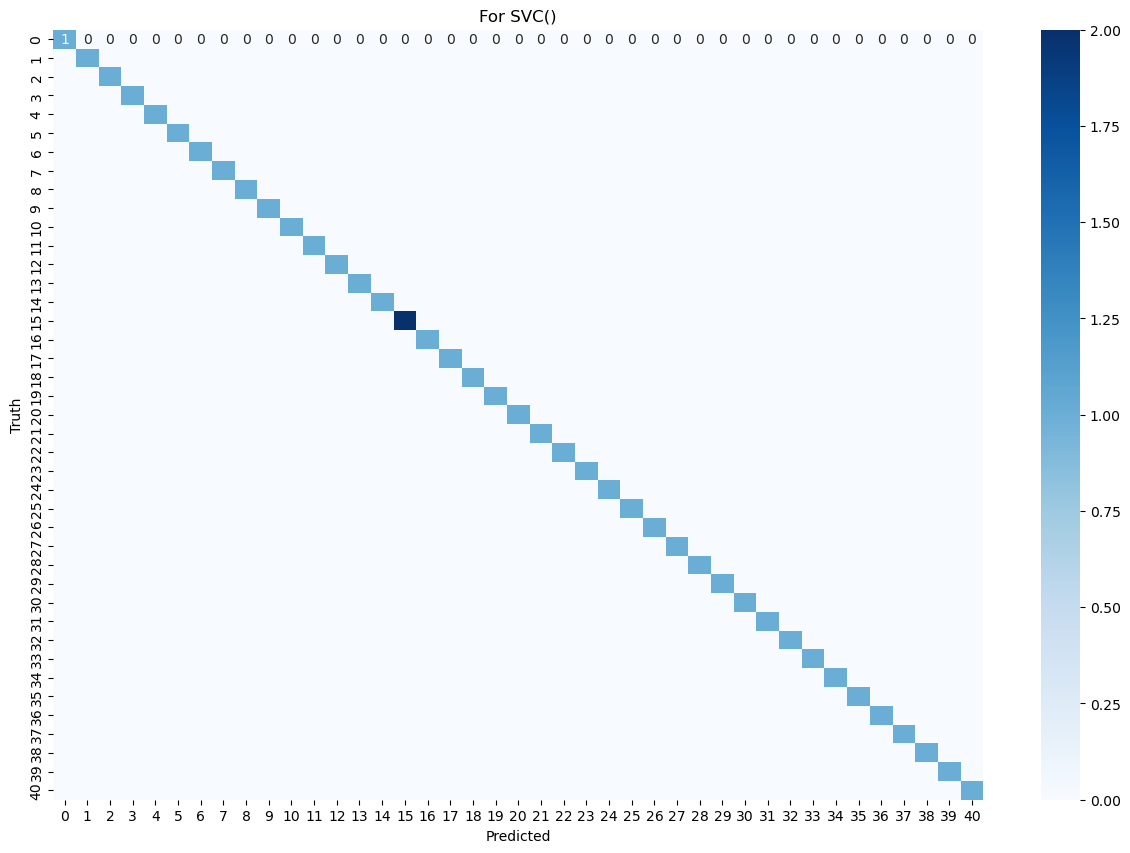

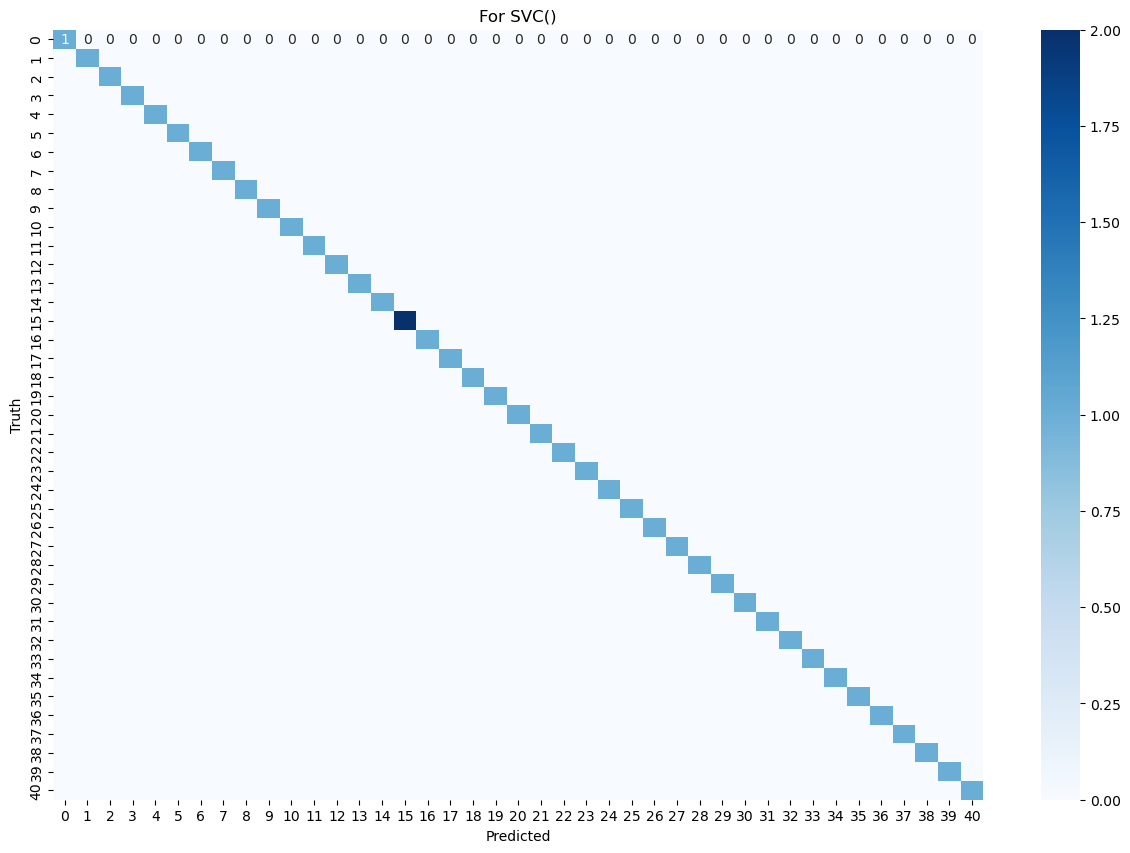

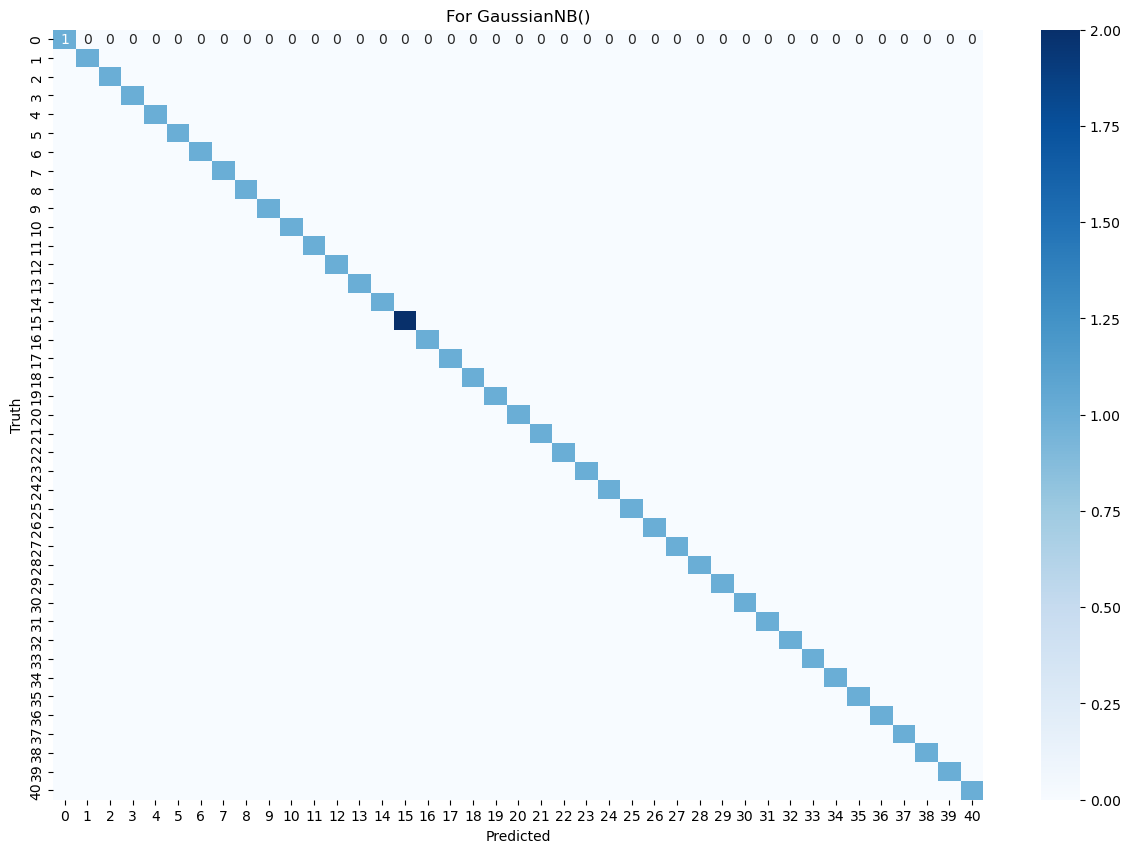

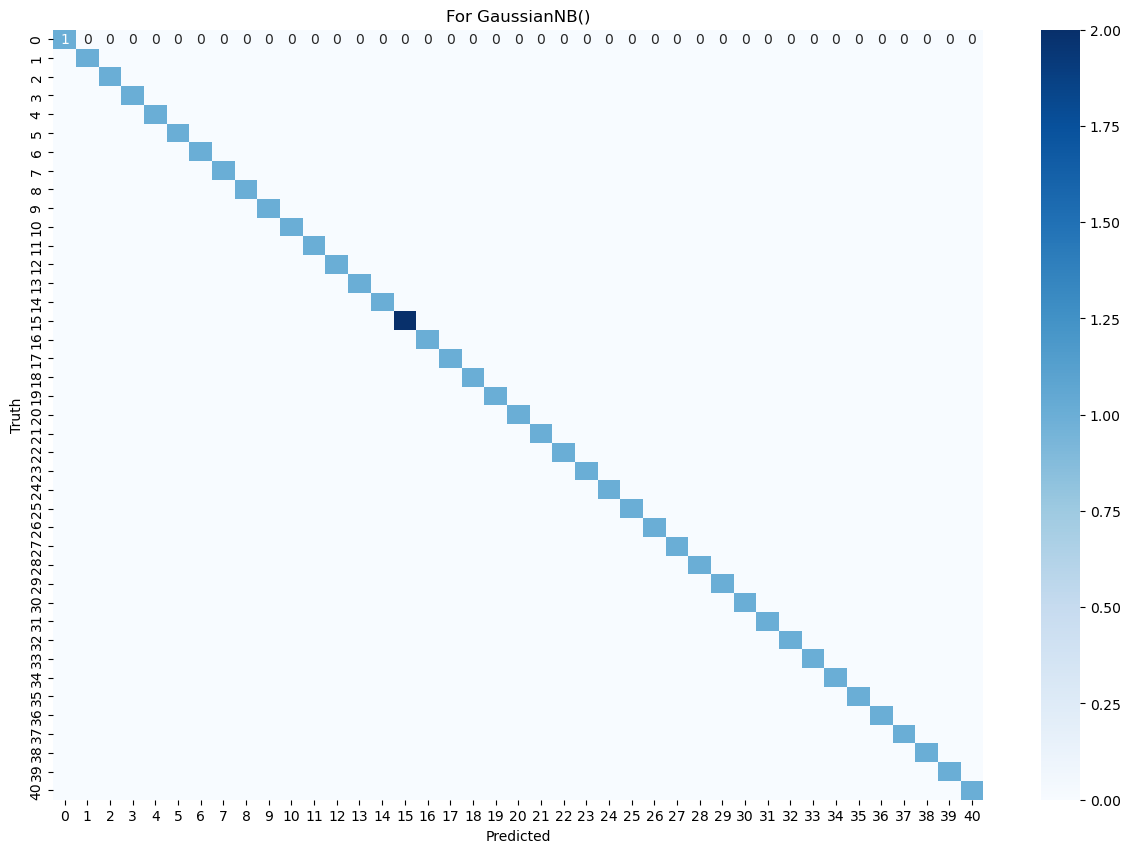

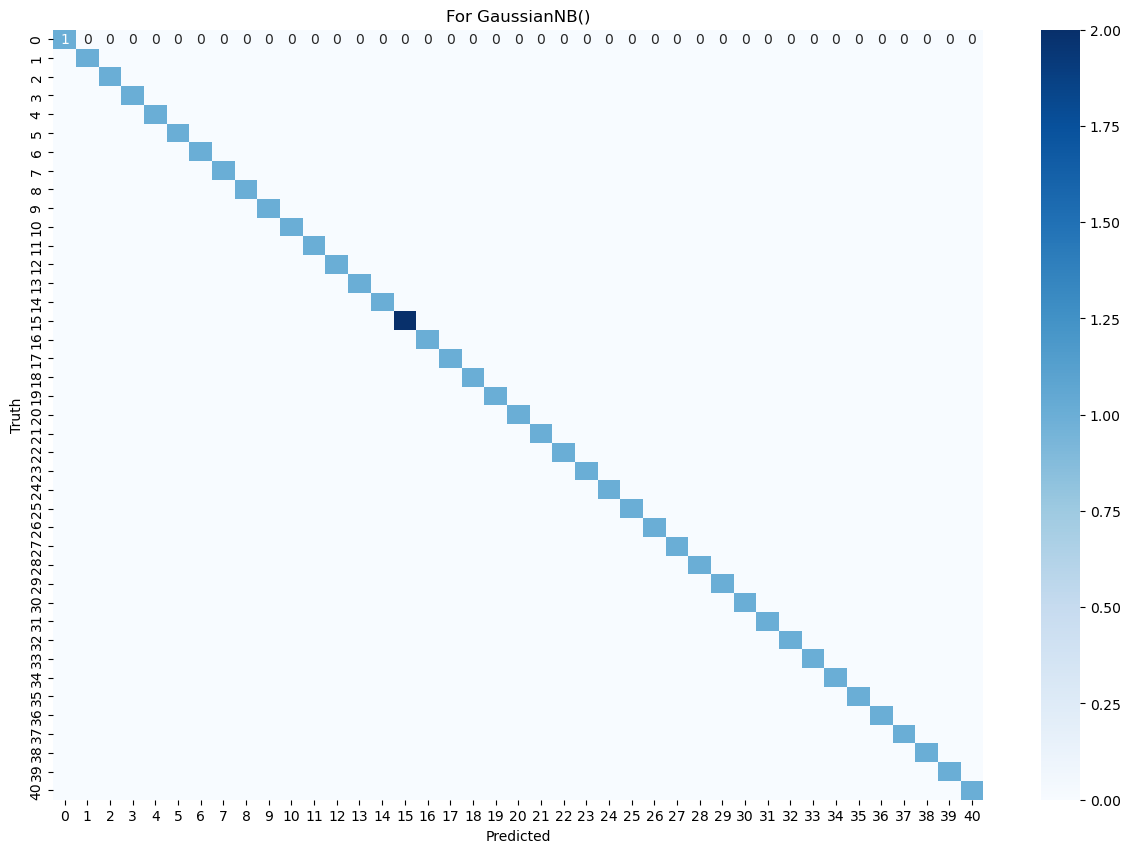

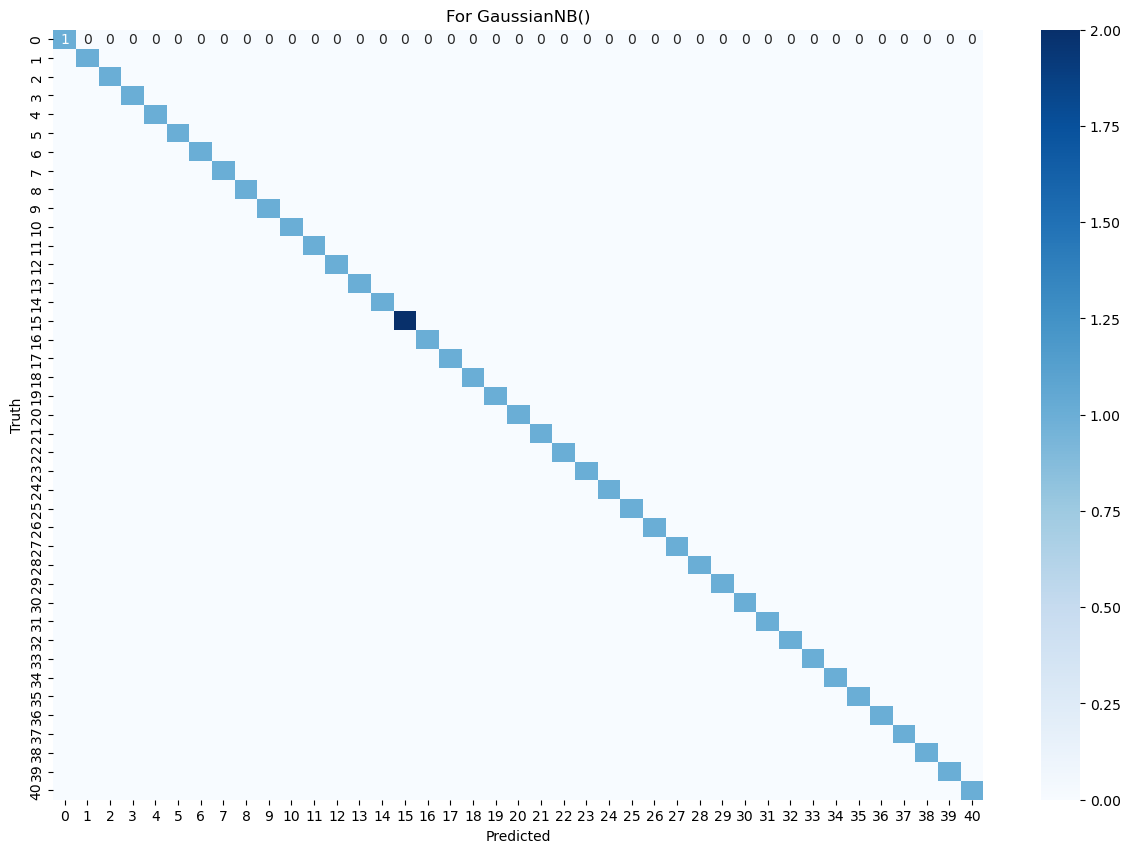

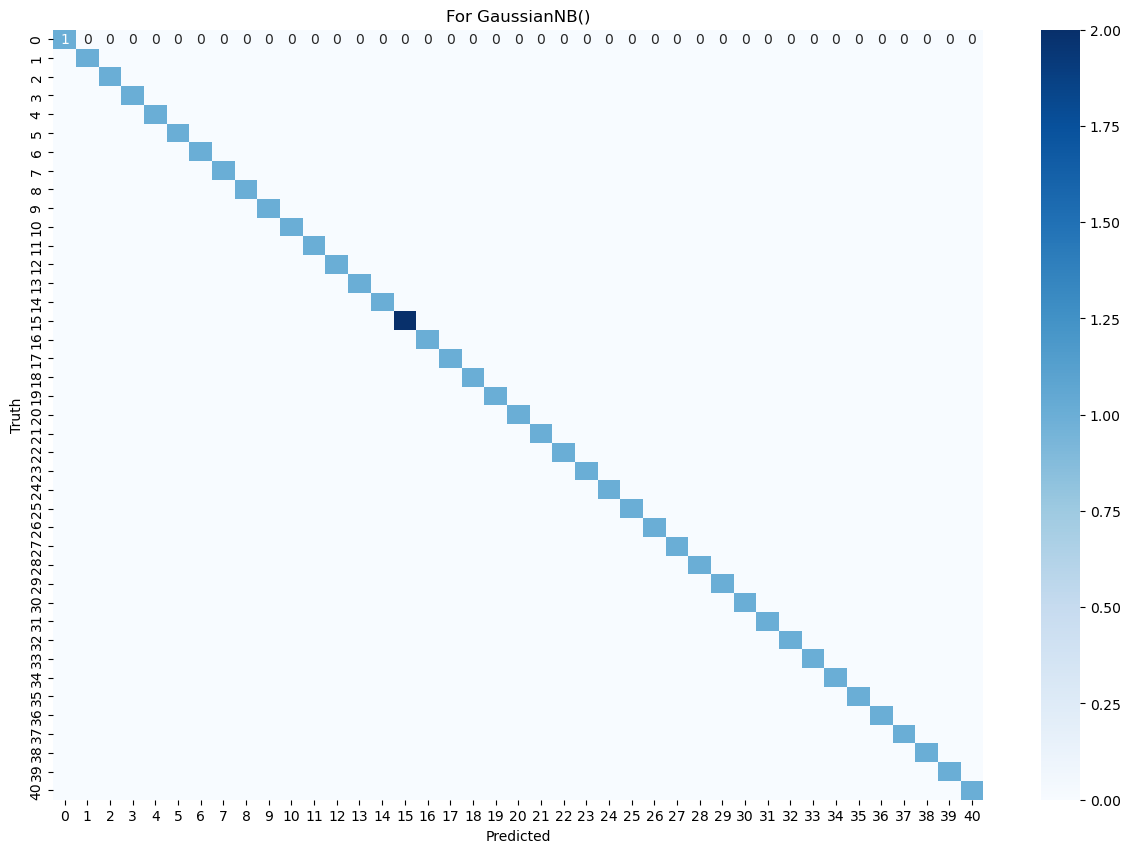

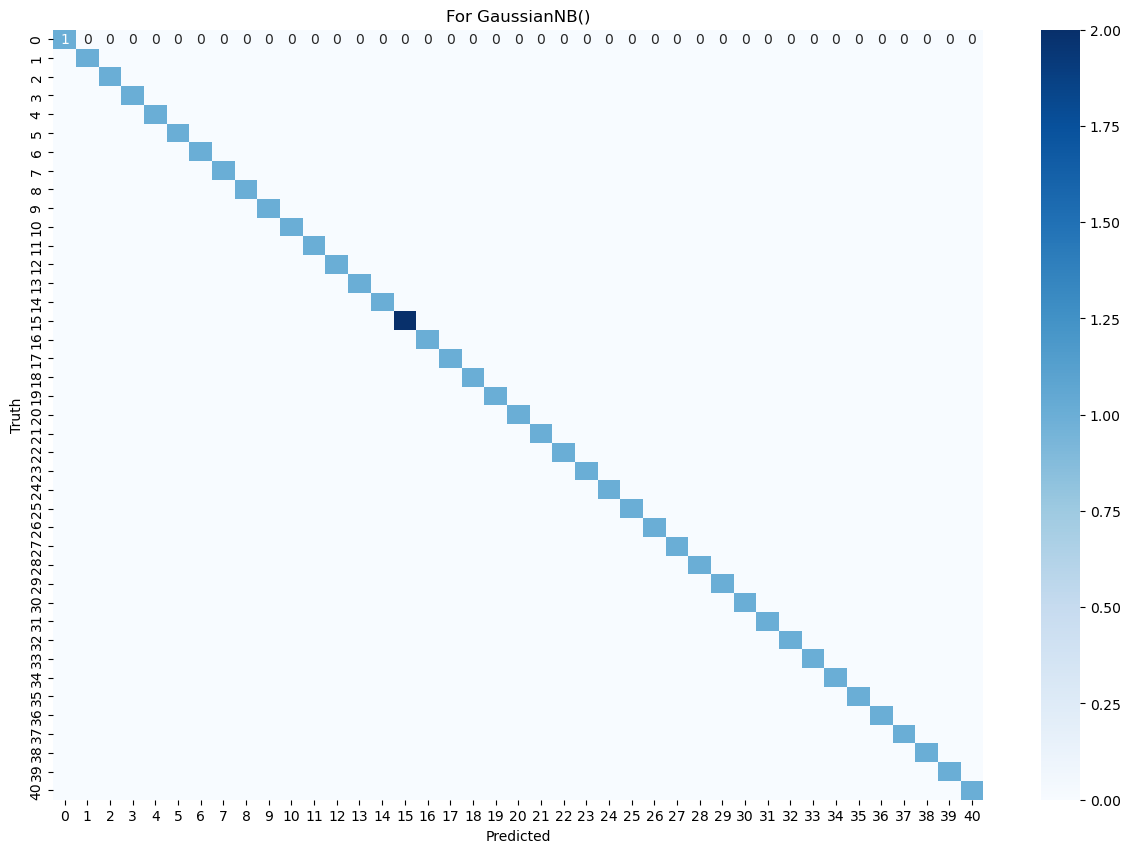

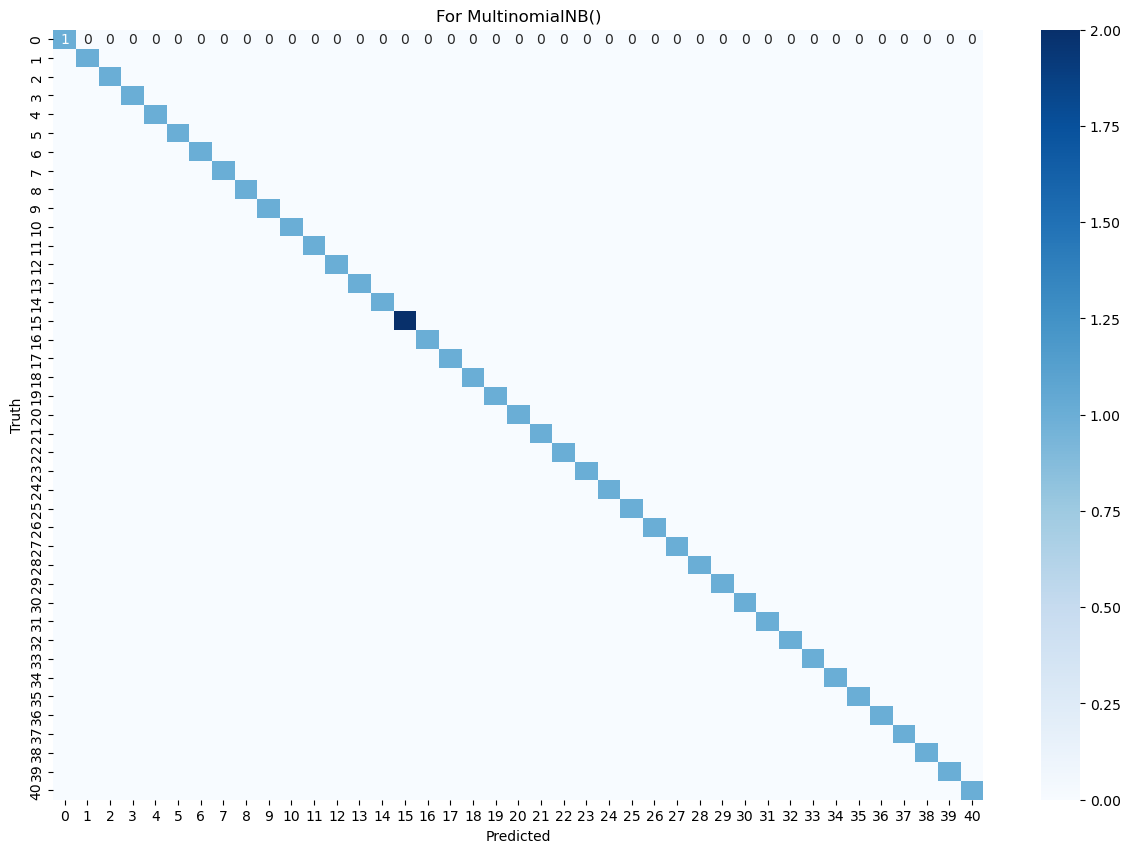

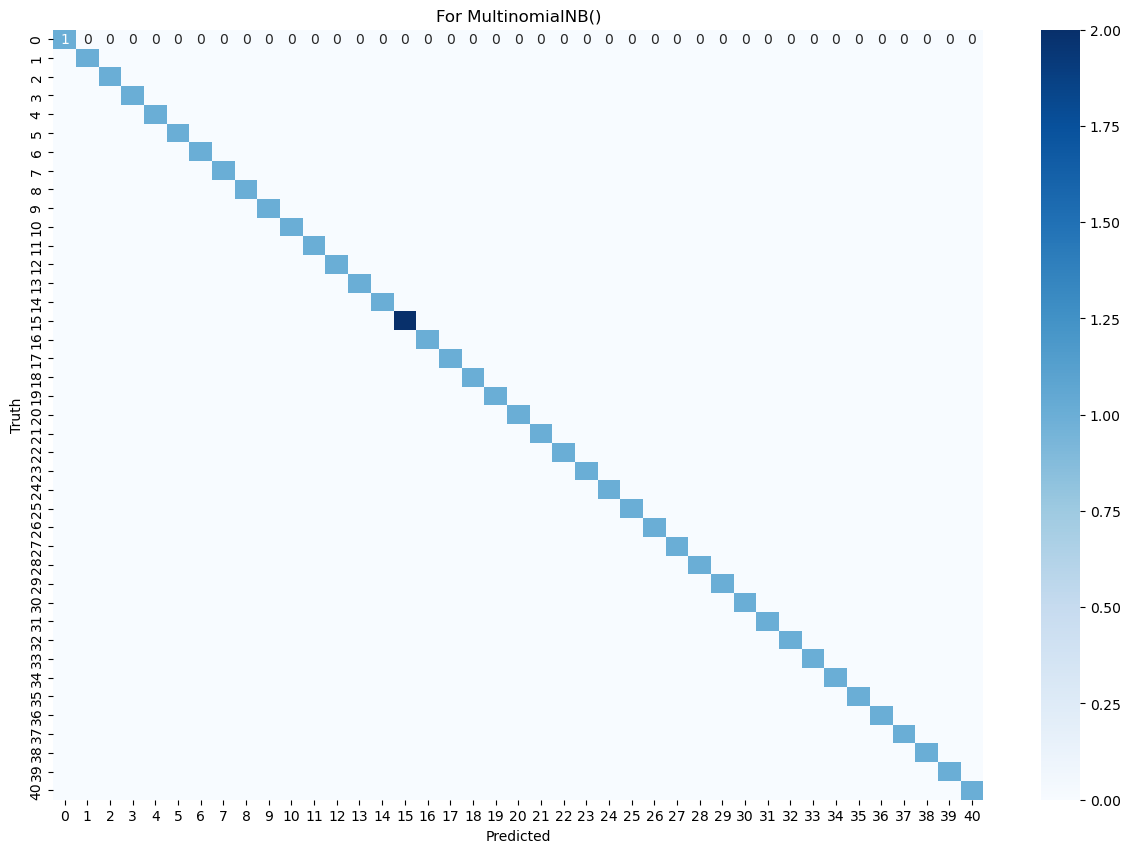

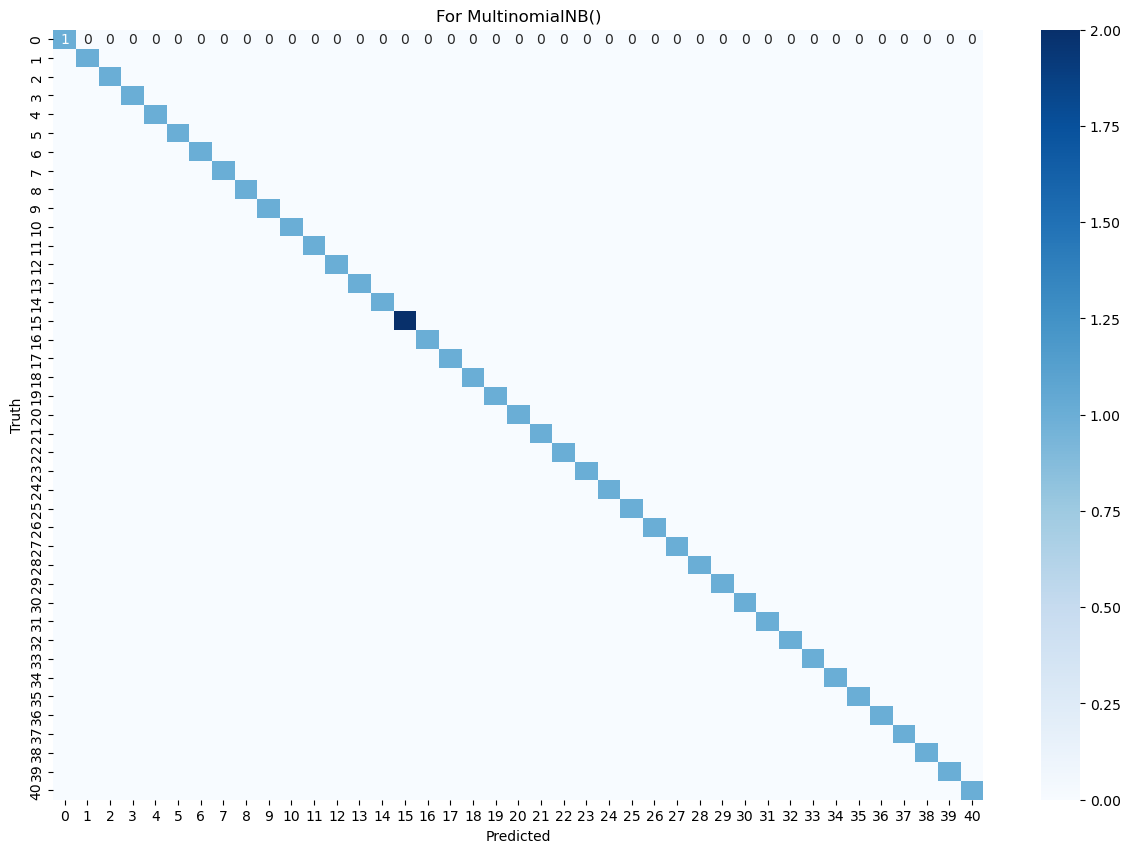

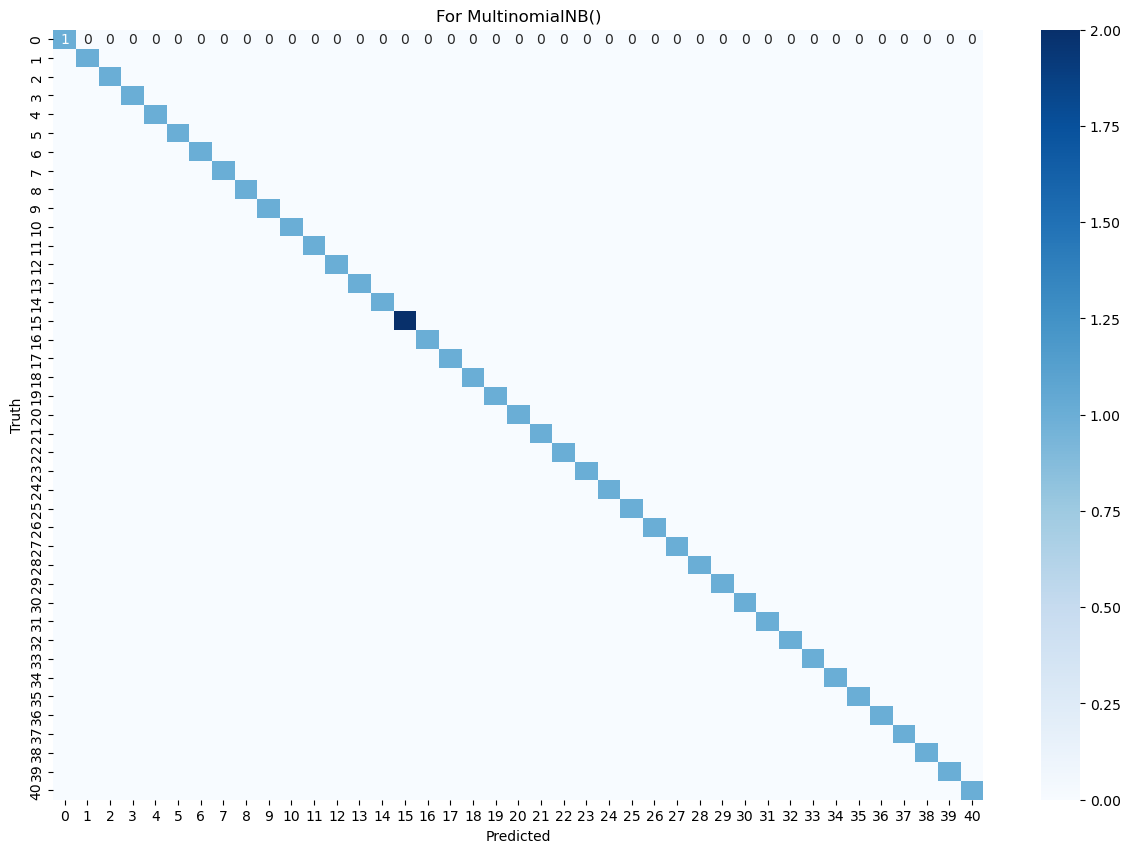

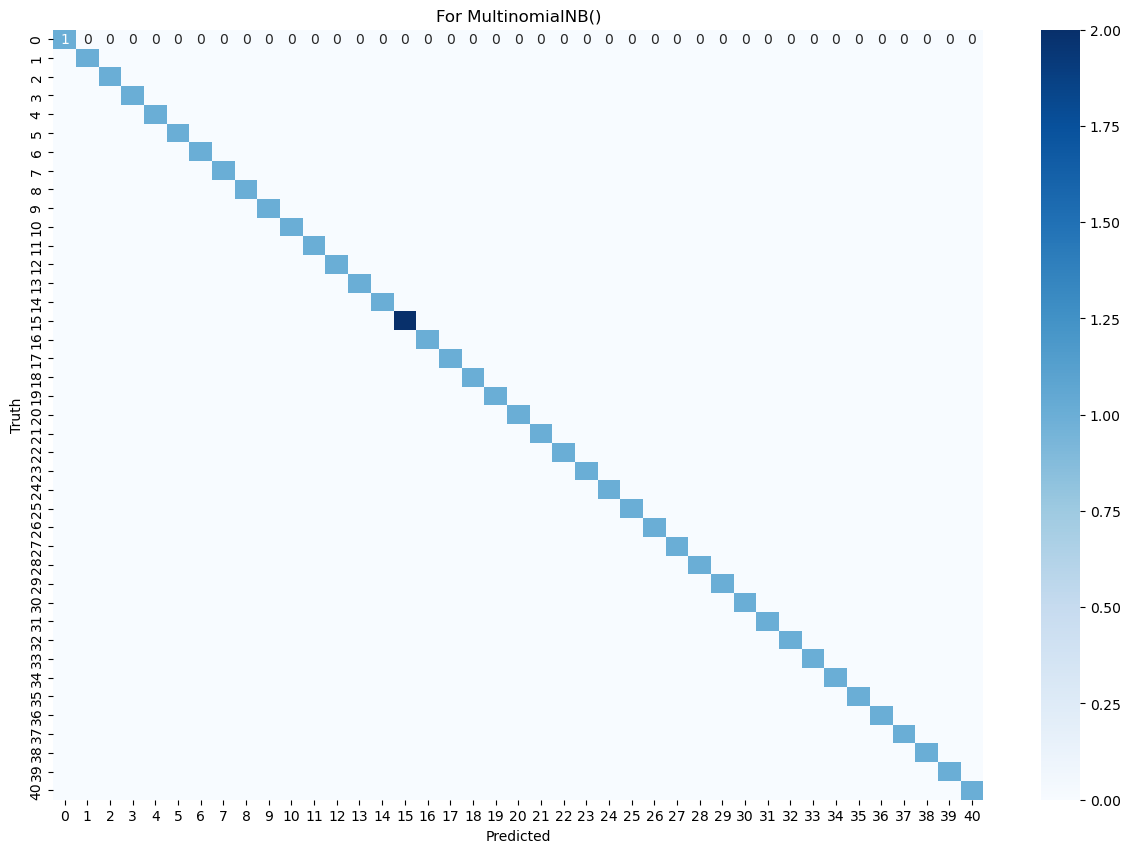

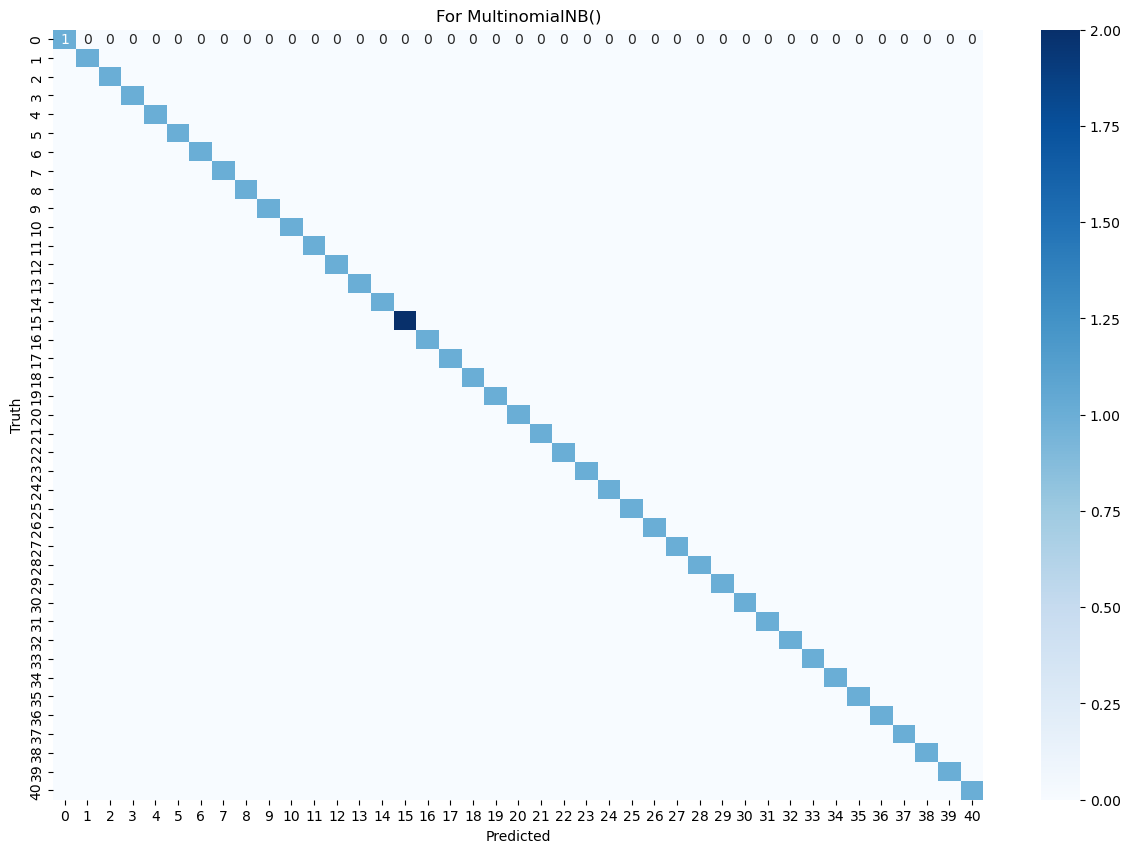

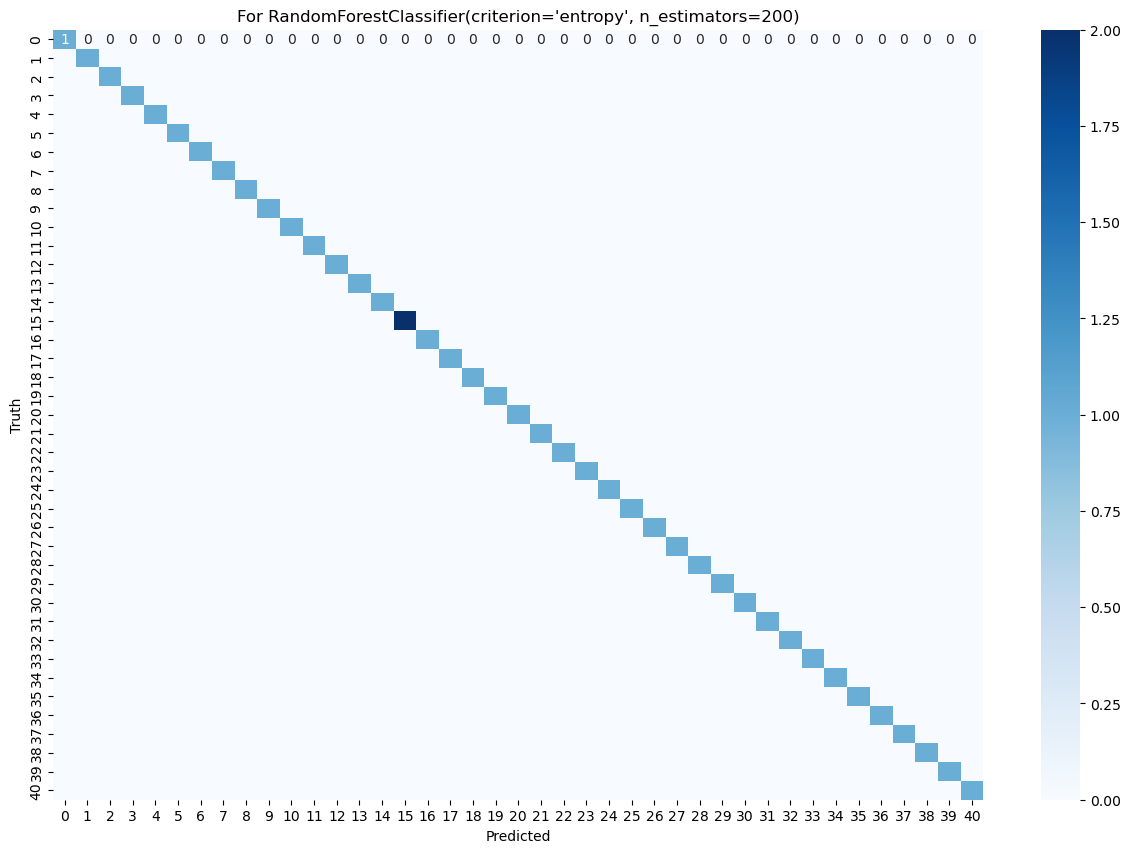

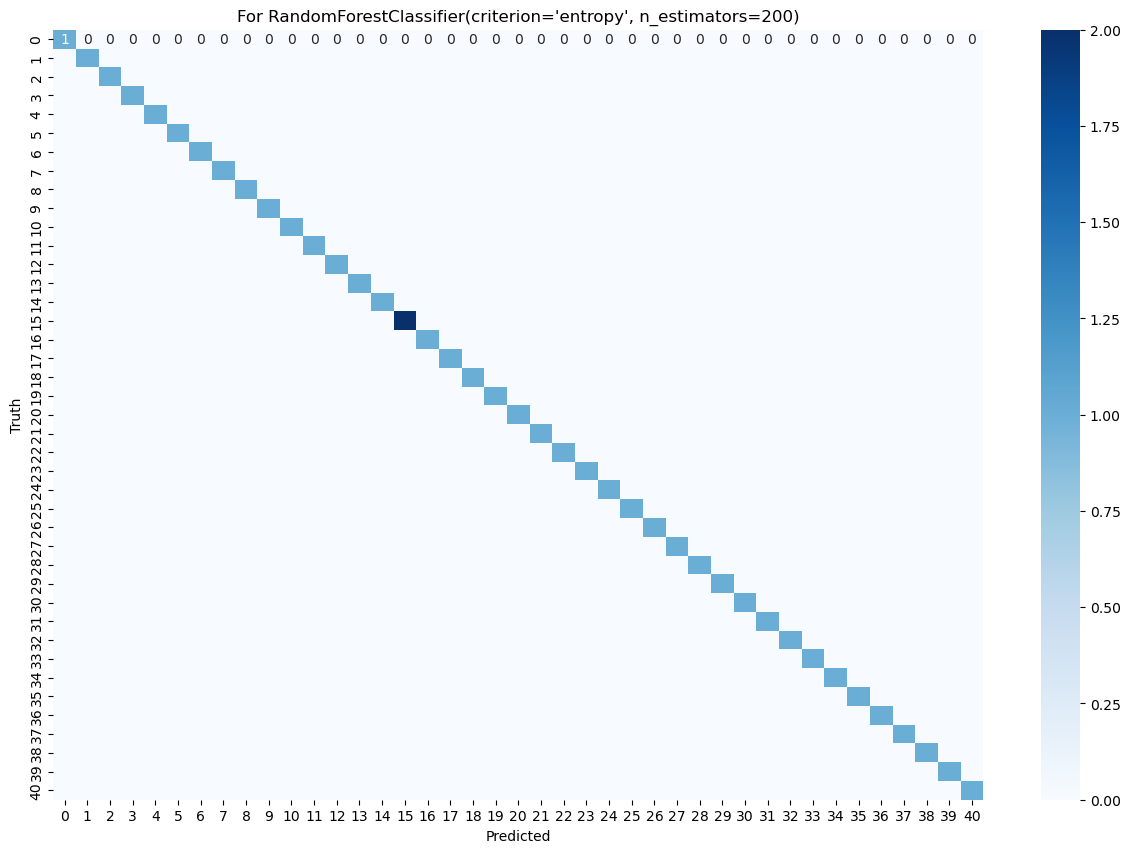

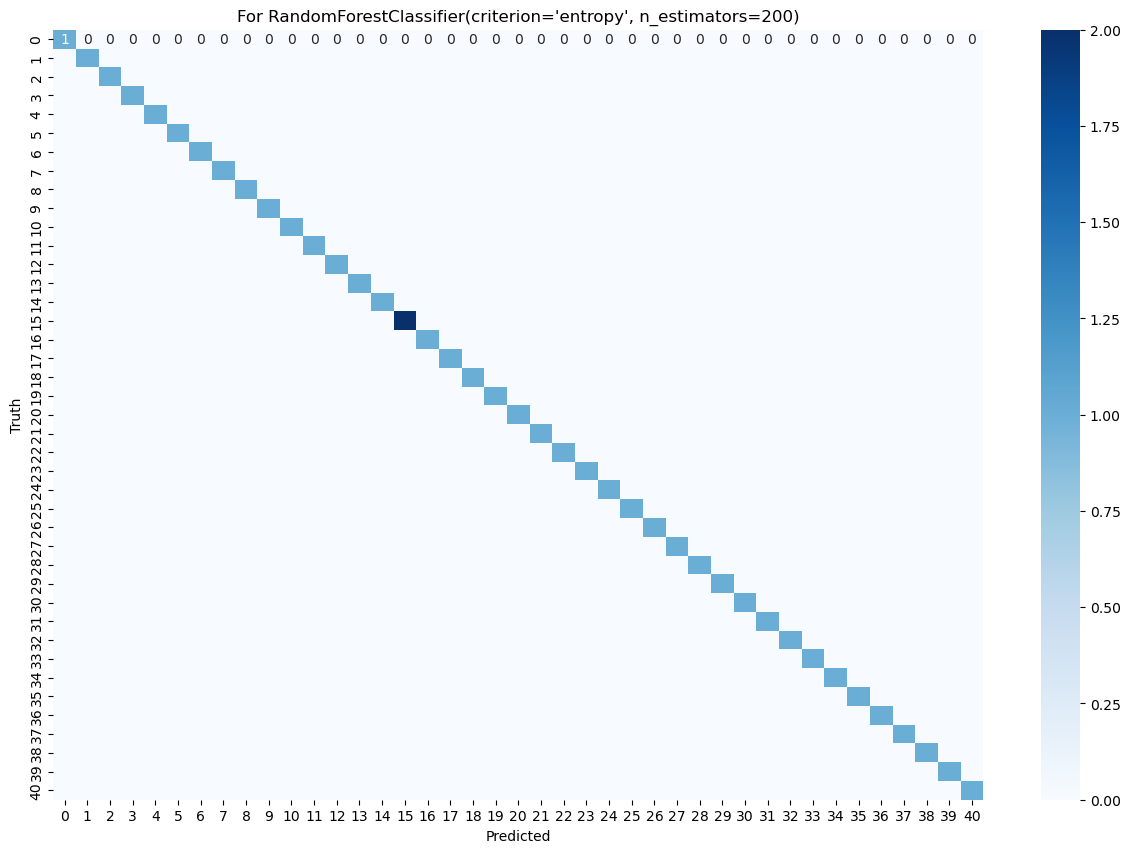

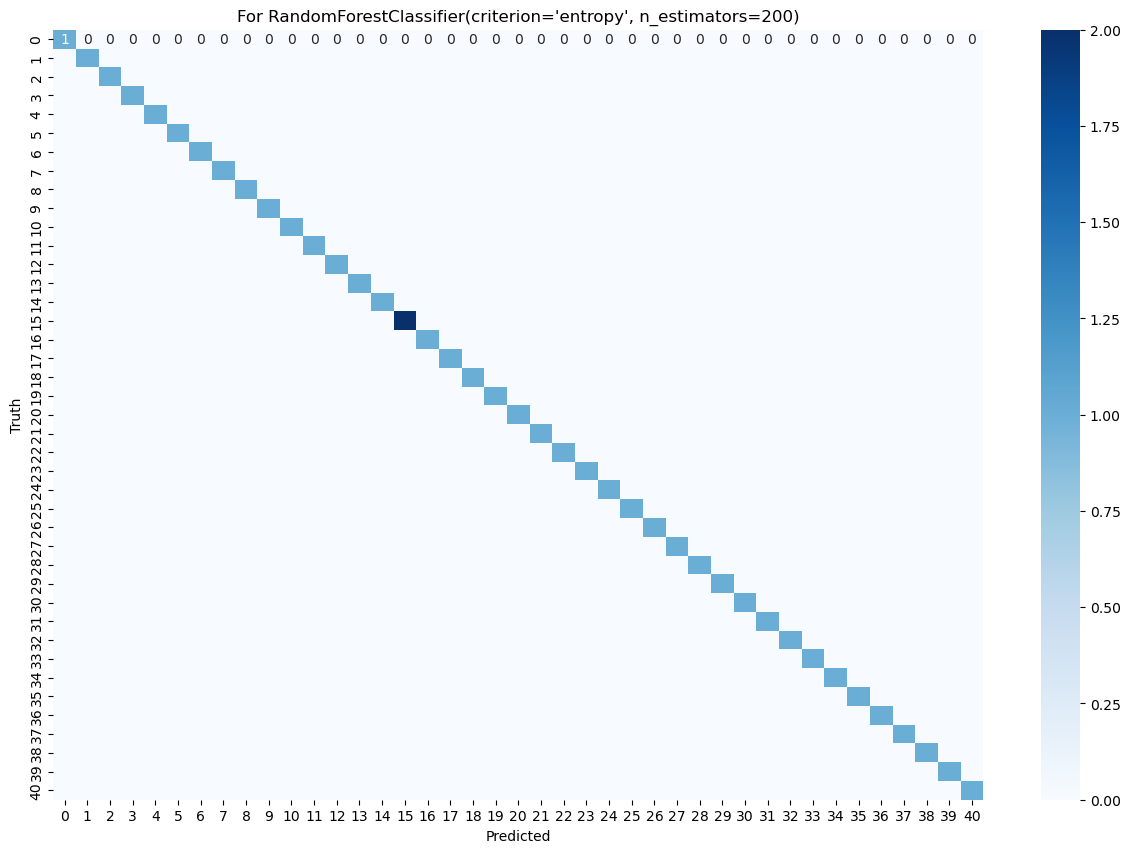

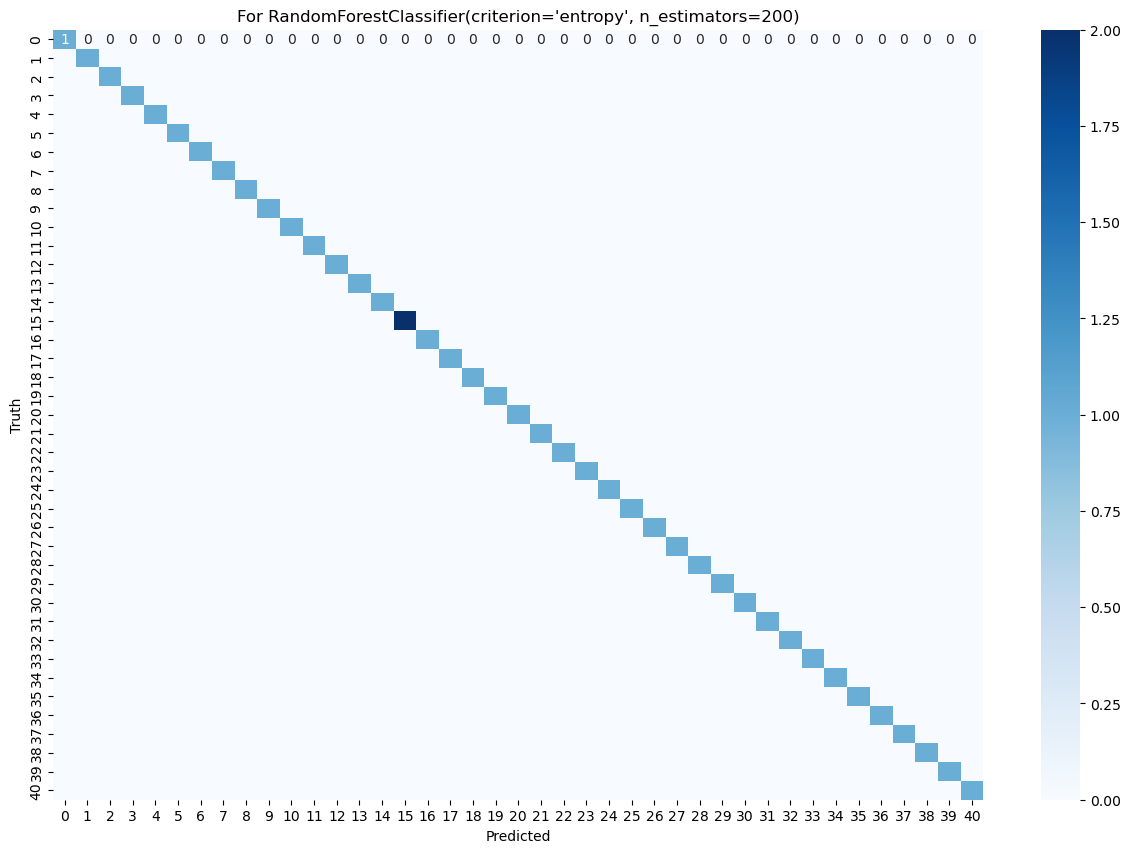

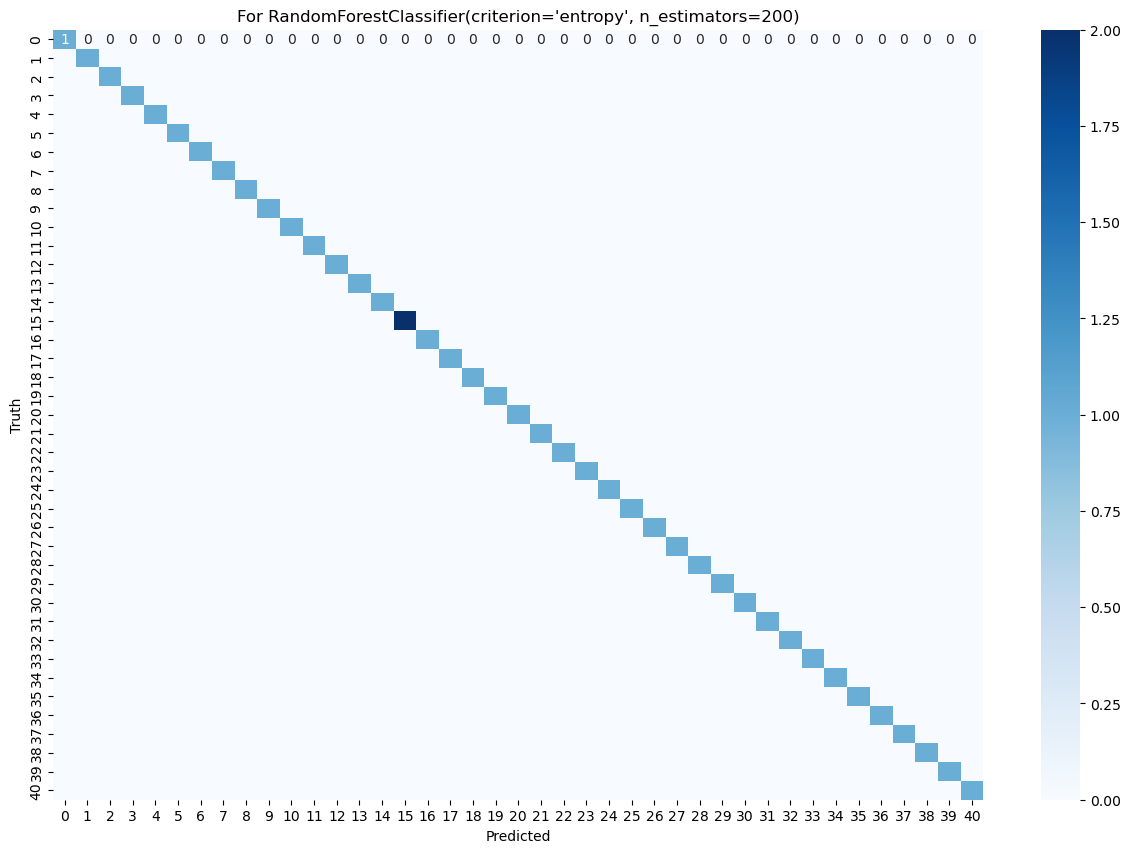

In [ ]:
#### to view confusion matrix for all the matrix
#for model in models:
#    y_pred = [model.predict(X_test) for model in models]
#    for y_pred in y_pred:
#        plt.figure(figsize=(15,10))
#        sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues')
#        plt.title(f'For {model}')
#        plt.xlabel('Predicted')
#        plt.ylabel('Truth')
#        plt.show()

In [18]:
#models = [model1, model2, model3, model4, model5, model6]
eval_met = []

for model in models:
    y_pred = model.predict(df_test.drop(['prognosis','prognosis_encoded'], axis=1))
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    eval_met.append([str(model), mse, rmse, mae, r2])

eval_met_df = pd.DataFrame(eval_met, columns=['Model', 'Mean Squared Error', 'Root Mean Squared Error',
                                              'Mean Absolute Error', 'R2 score'])

eval_met_df

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 score
0,LogisticRegression(),0.0,0.0,0.0,1.0
1,DecisionTreeClassifier(criterion='entropy'),0.0,0.0,0.0,1.0
2,SVC(),0.0,0.0,0.0,1.0
3,GaussianNB(),0.0,0.0,0.0,1.0
4,MultinomialNB(),0.0,0.0,0.0,1.0
5,"RandomForestClassifier(criterion='entropy', n_...",0.0,0.0,0.0,1.0


In [19]:
models = [model1, model2, model3, model4, model5, model6]
scores_data = []

for model in models:
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    scores_data.append([str(model), train_score, test_score])

scores_df = pd.DataFrame(scores_data, columns=['Model', 'Train Score', 'Test Score'])

print(scores_df)

                                               Model  Train Score  Test Score
0                               LogisticRegression()          1.0         1.0
1        DecisionTreeClassifier(criterion='entropy')          1.0         1.0
2                                              SVC()          1.0         1.0
3                                       GaussianNB()          1.0         1.0
4                                    MultinomialNB()          1.0         1.0
5  RandomForestClassifier(criterion='entropy', n_...          1.0         1.0


In [20]:
#sym_list = ['Fatigue', 'Low energy', 'Hairfall', 'Anaemia']
symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills']

In [21]:
# Function to convert symptom words to numerical representation
def convert_symptoms_to_numerical(symptoms):
    frames=[df_train, df_test]
    X = pd.concat(frames)
    X = X.drop(['prognosis','prognosis_encoded'], axis= 'columns')
    all_symptoms = X.columns
    symptom_dict = {symptom: 0 for symptom in all_symptoms}
    for symptom in symptoms:
        if symptom in symptom_dict:
            symptom_dict[symptom] = 1
    return symptom_dict

In [22]:
def predict_disease(symptoms):
    symptoms_dict = convert_symptoms_to_numerical(symptoms)
    symptoms_df = pd.DataFrame([symptoms_dict])
    
    models = [model1, model2, model3, model4, model5, model6]
    en_pred_models = [model.predict(symptoms_df)[0] for model in models]

    
    encoded_prediction = statistics.mode(en_pred_models)
    prediction = label_encoder.inverse_transform([encoded_prediction])
    
    return prediction[0]

In [23]:
predict_disease(symptoms)

'Fungal infection'